# COSMOS field

## 3D-HST spectroscopy 
## HELP 24$\mu$m and Herschel ( PACS, SPIRE )
## Laigle et al., 2016 photometry ( GALEX, u, B, V, r, i, z, J, H, Ks, IRAC( 1,2,3,4 ) )

3D-HST: https://3dhst.research.yale.edu/Data.php

HELP:   http://hedam.lam.fr/HELP/

Laigle: ftp://ftp.iap.fr/pub/from_users/hjmcc/COSMOS2015

In [1]:
# Importing regular packages. The herschelhelp_internal.utils is already installed in my machine
# so the only thing I have to do is to run the 'source activate herschelhelp_internal' in the terminal 
# and after that change the kernel in the notebook. 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from astropy.table import Table, Column
import pandas as pd
import os

# from herschelhelp_internal.utils import astrometric_correction, mag_to_flux, flux_to_mag

from astropy import units as u
from astropy.coordinates import SkyCoord, ICRS
from astropy import visualization as vz

%matplotlib inline

# Data sample

In [2]:
# Data from Laigle et al., 2016
# Photometry: GALEX NUV, MegaCam/CFHT u, Suprime-Cam/ Subaru (B, V r, i+, z++)
#             HSC/Subaru Y, IRAC/Spitzer (SPLASH) (ch1, ch2, ch3, ch4) 

laigle_16      = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
COSMOS/COSMOS_Laigle/COSMOS2015_Laigle+_v1.1.fits', format = 'fits')

print('Data in laigle_16 %i'%(len(laigle_16)))

#===================================================================================================================

# Data from Help Project
# Photometry: Spitzer MIPS 24, Herschel PACS (100, 160)
#             Herschel SPIRE (250, 350, 500)

# help_18        = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
# /COSMOS_HELP/COSMOS_20180619.fits', format = 'fits')

help_XID_MIPS        = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
COSMOS/COSMOS_HELP/dmu26_XID+MIPS_COSMOS_20170213.fits', format = 'fits')

help_XID_PACS        = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
COSMOS/COSMOS_HELP/dmu26_XID+PACS_COSMOS_20170303.fits', format = 'fits')

help_XID_SPIRE       = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
COSMOS/COSMOS_HELP/dmu26_XID+SPIRE_COSMOS_20161129.fits', format = 'fits')

# GALEX_GASC = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
# COSMOS/COSMOS_HELP/GALEX-GASC-HELP_20170116.fits', format = 'fits')

# GALEX_GMSC =Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
# COSMOS/COSMOS_HELP/GALEX-GMSC-HELP_20170116.fits', format = 'fits')

GALEX_merged = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
COSMOS/COSMOS_HELP/GALEX-merged.fits', format = 'fits')

print('Data in HELP (MIPS, PACS, SPIRE) %i\t%i\t%i'%(len(help_XID_MIPS), len(help_XID_PACS), len(help_XID_SPIRE)))
# print('Data in GALEX_GASC: %i \t Data in GALEX_GMSC:%i'%(len(GALEX_GASC ), len(GALEX_GMSC)))
print('Data in HELP GALEX merged (GASC and GMSC): %i'%len(GALEX_merged))

#===================================================================================================================

# Data from 3D-HST
# Redshifts and emission lines (Ha, Hb, OII, OIII)

# Concatenated grism redshift catalog
# z_spec: spectroscopic redshift where available (-1 if not available)
# z_peak_phot: photometric redshift from Skelton et al., 2014 
cosmos_zfit    = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/\
COSMOS_3DHST/cosmos_3dhst.v4.1.5.zfit.concat.fits', format = 'fits')

# Concatenated emission line catalog
# Ha_FLUX, Ha_FLUX_ERR, Hb_FLUX, Hb_FLUX_ERR, OII_FLUX, OII_FLUX_ERR, OIII_FLUX, OIII_FLUX_ERR
cosmos_lf      = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/\
COSMOS_3DHST/cosmos_3dhst.v4.1.5.linefit.concat.fits', format = 'fits')

# Linematched grism emission catalog 
cosmos_lf_lm   = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/\
COSMOS_3DHST/cosmos_3dhst.v4.1.5.linefit.linematched.fits', format = 'fits')

# Linematched grism redshift catalog 
cosmos_zfit_lm = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/\
COSMOS_3DHST/cosmos_3dhst.v4.1.5.zfit.linematched.fits', format = 'fits')

# Best redshift catalog
# z_spec from Skelton et al., 2014, if not z_max_grism is used, if not z_phot is used
cosmos_zbest   = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/\
COSMOS_3DHST/cosmos_3dhst.v4.1.5.zbest.fits', format = 'fits')


print('Data in line fit %i and data in zfit %i'%(len(cosmos_lf), len(cosmos_zfit)))
print('Data in linefit-linematched %i, in zbest %i and zfit-linematched %i'%\
      (len(cosmos_lf_lm), len(cosmos_zbest), len(cosmos_zfit_lm)))

# Photometric catalog. It is needed for the RA and DEC information
cosmos_phot = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/COSMOS_phot/Catalog/\
cosmos_3dhst.v4.1.cat.FITS', format = 'fits')

Data in laigle_16 1182108
Data in HELP (MIPS, PACS, SPIRE) 320092	320092	44310
Data in HELP GALEX merged (GASC and GMSC): 2213
Data in line fit 17333 and data in zfit 17333
Data in linefit-linematched 33879, in zbest 33879 and zfit-linematched 33879


# Checking GALEX data ( GASC and GMSC )

### GASC :
Contains fluxes measured for 1 884 348 sources down to NUV 21(AB mag) and exposure times up to 800s

### GMSC:
Contains fluxes measured for 3 121 917 sources down to NUV 23(AB mag) and exposure times 800-10,000s

This was performed in order to obtaine GALEX flux data from the HELP database and be able to compare those measurements to the ones reported by Laigle et al., 2016

(0, 50)

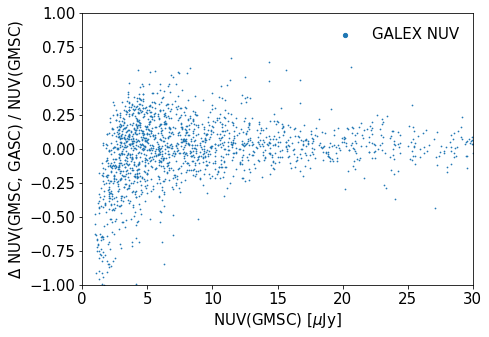

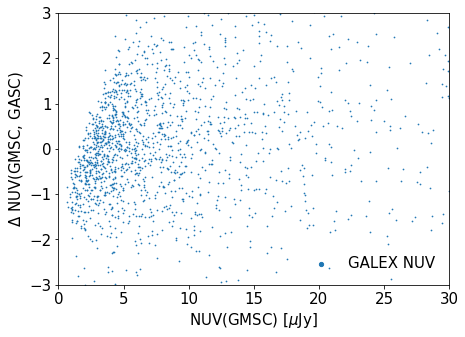

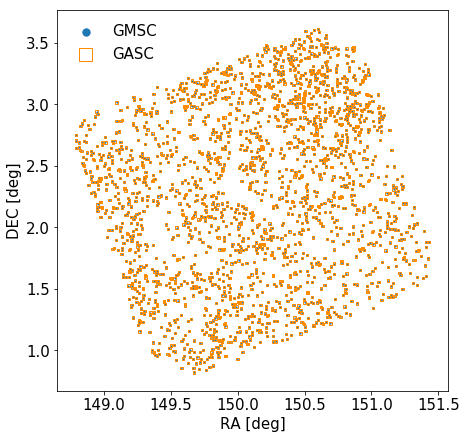

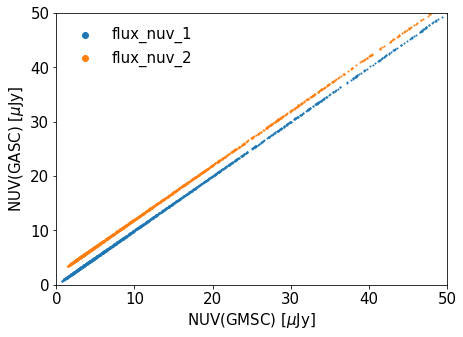

In [75]:
# GALEX NUV data for the COSMOS field
# Fig1. corresponds to the NUV measurements in both files. The relative error and the observed value. 
# Fig2. shows just the difference between the values reported in both files.
# Fig3. shows the position in RA and DEC for the sources in both files.
# Fig4. shows the flux in both files shifted and just for scale comaprison. 

plt.figure(figsize = (7, 5))
plt.scatter(GALEX_merged['flux_nuv_1'],\
            (GALEX_merged['flux_nuv_1']-GALEX_merged['flux_nuv_2'])/GALEX_merged['flux_nuv_1'],\
           s = 0.5, label = 'GALEX NUV')
plt.ylim(-1, 1)
plt.xlim(0,30)
plt.xlabel(r'NUV(GMSC) [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'$\Delta$ NUV(GMSC, GASC) / NUV(GMSC)', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 6 , loc = 'best');

plt.figure(figsize = (7, 5))
plt.scatter(GALEX_merged['flux_nuv_1'],\
            (GALEX_merged['flux_nuv_1']-GALEX_merged['flux_nuv_2']),\
           s = 0.5, label = 'GALEX NUV')
plt.ylim(-3, 3)
plt.xlim(0,30)
plt.xlabel(r'NUV(GMSC) [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'$\Delta$ NUV(GMSC, GASC)', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 6 , loc = 'best');

plt.figure(figsize = (7,7))
plt.scatter(GALEX_merged['ra_1'], GALEX_merged['dec_1'], s = 1.5, label = 'GMSC')
plt.scatter(GALEX_merged['ra_2'], GALEX_merged['dec_2'], marker = 's', s = 5,\
            label = 'GASC', facecolors='none', edgecolors='darkorange')
plt.xlabel('RA [deg]', fontsize = 15)
plt.ylabel('DEC [deg]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 6 , loc = 'best');

plt.figure(figsize = (7,5))
plt.scatter(GALEX_merged['flux_nuv_1'], GALEX_merged['flux_nuv_1'], s = 1)
plt.scatter(GALEX_merged['flux_nuv_2'], GALEX_merged['flux_nuv_2'] + 2, s = 1)
plt.xlabel(r'NUV(GMSC) [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'NUV(GASC) [$\mu$Jy]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 6 , loc = 'best');
plt.xlim(0, 50)
plt.ylim(0, 50)

# HELP large sample Photometry  
# u, B, V, r, i, z, Y, J, H, K
# IRAC1, IRAC2, IRAC3, and IRAC4
# Spitzer 24 $\mu$m
# Herschel: PACS and SPIRE

##### Laigle et al., 2016 : Survey ///                    Filters      ///       Filters in File

                      GALEX                         (NUV)                  (NUV)
                      MegaCam/CFHT                  (u)                    (u)
                      Suprime-Cam/subaru            (B, V, r, i+, z++)     (B, V, r, ip, zpp)
                      HSC/Subaru                    (Y)                    (yHSC)
                      VIRCAM/VISTA (UltraVISTA-DR2) (Y, J, H, Ks)          (Y, J, H, Ks)
                      WIRCam                        (H, Ks)                (Hw, Ksw)
                      IRAC/Spitzer (SPLASH)         (ch1, ch2, ch3, ch4)   (SPLASH1, SPLASH2, SPLASH3, SPLASH4)
                      
##### HELP projec:         Survey ///                    Filters      ///       Filters in File

                     MegaCam/CFH                    ----> omegacam
                     Suprime-Cam/subaru             ----> suprime
                     HSC/Subaru                     ----> suprime
                     VIRCAM/VISTA (UltraVISTA-DR2)  ----> vista
                     IRAC/Spitzer (SPLASH)          ----> irac_i1, irac_i2, irac_i3, irac_i4
                     PACS                           ----> pacs_green, pacs_red
                     SPIRE                          ----> spire_250, spire_350, spire_500

In [3]:
# Uploading the large file from the HELP database to save a samaller one with the info required

# Old version
# help_large   = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_old/\
# COSMOS_HELP/COSMOS_20180619.fits', format = 'fits')

# help_large   = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/\
# COSMOS_HELP/COSMOS_20181106.fits', format = 'fits')

help_large   = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/\
COSMOS_HELP/COSMOS_20181106_corrected.fits', format = 'fits')

In [ ]:
# The IDs, RA, DEC, photometry and redshift needed are saved in a new file called:
# 'HELP_subsample_merged.fits'

HELP_large = Table([help_large['help_id'], help_large['ra'], help_large['dec'],\
                        help_large['f_omegacam_u'], help_large['ferr_omegacam_u'], help_large['f_suprime_b'],\
                        help_large['ferr_suprime_b'], help_large['f_suprime_v'], help_large['ferr_suprime_v'],\
                        help_large['f_suprime_r'], help_large['ferr_suprime_r'], help_large['f_suprime_ip'],\
                        help_large['ferr_suprime_ip'], help_large['f_suprime_zpp'], help_large['ferr_suprime_zpp'],\
                        help_large['f_suprime_y'],help_large['ferr_suprime_y'], help_large['f_vista_j'],\
                        help_large['ferr_vista_j'], help_large['f_vista_h'], help_large['ferr_vista_h'],\
                        help_large['f_vista_ks'], help_large['ferr_vista_ks'], help_large['f_irac_i1'],\
                        help_large['ferr_irac_i1'],  help_large['f_irac_i2'],  help_large['ferr_irac_i2'],\
                        help_large['f_irac_i3'],  help_large['ferr_irac_i3'],  help_large['f_irac_i4'],\
                        help_large['ferr_irac_i4'],  help_large['f_mips_24'],  help_large['ferr_mips_24'],\
                        help_large['f_pacs_green'],  help_large['ferr_pacs_green'],  help_large['f_pacs_red'],\
                        help_large['ferr_pacs_red'], help_large['f_spire_250'], help_large['ferr_spire_250'],\
                        help_large['f_spire_350'], help_large['ferr_spire_350'], help_large['f_spire_500'],\
                        help_large['ferr_spire_500'], help_large['zspec']],\
               names = ('HELP_id', 'help_ra', 'help_dec',\
                        'help_f_omegacam_u', 'help_ferr_omegacam_u', 'help_f_suprime_b',\
                        'help_ferr_suprime_b', 'help_f_suprime_v', 'help_ferr_suprime_v',\
                        'help_f_suprime_r', 'help_ferr_suprime_r', 'help_f_suprime_ip',\
                        'help_ferr_suprime_ip', 'help_f_suprime_zp', 'help_ferr_suprime_zpp',\
                        'help_f_suprime_y', 'help_ferr_suprime_y', 'help_f_vista_j',\
                        'help_ferr_vista_j', 'help_f_vista_h', 'help_ferr_vista_h',\
                        'help_f_vista_ks', 'help_ferr_vista_ks', 'help_f_irac_i1',\
                        'help_ferr_irac_i1', 'help_f_irac_i2', 'help_ferr_irac_i2',\
                        'help_f_irac_i3', 'help_ferr_irac_i3', 'help_f_irac_i4',\
                        'help_ferr_irac_i4', 'help_f_mips_24', 'help_ferr_mips_24',\
                        'help_f_pacs_green', 'help_ferr_pacs_green', 'help_f_pacs_red',\
                        'help_ferr_pacs_red', 'help_f_spire_250', 'help_ferr_spire_250',\
                        'help_f_spire_350', 'help_ferr_spire_350', 'help_f_spire_500',\
                        'help_ferr_spire_500', 'help_zspec'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/COSMOS_HELP/HELP_subsample_merged.fits')
HELP_large.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                 'COSMOS_HELP/HELP_subsample_merged.fits', format='fits')

In [4]:
# I created this file with the new values for PACS red corrected

HELP_large_corrected = Table([help_large['help_id'], help_large['ra'], help_large['dec'],\
                        help_large['f_mips_24'],  help_large['ferr_mips_24'],\
                        help_large['f_pacs_green'],  help_large['ferr_pacs_green'],  help_large['f_pacs_red'],\
                        help_large['ferr_pacs_red'], help_large['f_spire_250'], help_large['ferr_spire_250'],\
                        help_large['f_spire_350'], help_large['ferr_spire_350'], help_large['f_spire_500'],\
                        help_large['ferr_spire_500']],\
               names = ('HELP_id', 'help_ra', 'help_dec',\
                        'help_f_mips_24', 'help_ferr_mips_24',\
                        'help_f_pacs_green', 'help_ferr_pacs_green', 'help_f_pacs_red',\
                        'help_ferr_pacs_red', 'help_f_spire_250', 'help_ferr_spire_250',\
                        'help_f_spire_350', 'help_ferr_spire_350', 'help_f_spire_500',\
                        'help_ferr_spire_500'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
          'COSMOS_HELP/HELP_subsample_merged_corrected.fits')

HELP_large_corrected.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                 'COSMOS_HELP/HELP_subsample_merged_corrected.fits', format='fits')

In [179]:
# Saving HELP ids to compare PACS and SPIRE data to the whole sample

HELP_ids = Table([help_large['help_id'], help_large['old_help_id']], names = ('id', 'old_id'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/COSMOS_HELP/HELP_ids.fits')

HELP_ids.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                 'COSMOS_HELP/HELP_ids.fits', format='fits')

# 3D-HST: redshift and emission line sample

The different files from the 3D-HST database are used to obtained the best redshift for each source along with information about the spectral lines. 

All this information is saved in different files so they must be crossmatched. I do not used TOPCAT (coordinates crossmatch) because there is a ID in each file corresponding to the photometric ID (phot_id) which can be used to easily merged the tables together using PANDAS. 

In [3]:
# From 3D-HST "cosmos_3dhst.v4.1.5.linefit.concat.fits" must be corssmatched to "cosmos_3dhst.v4.1.5.zbest.fits"
# This provides a sample with well measured redshifts and lines

# Column number must be changed to phot_id, Photometric id from Skelton et al., 2014
cosmos_lf.rename_column('number', 'phot_id')

# Tables must be converted to pandas frame
cosmos_lf    = cosmos_lf.to_pandas()
cosmos_zbest = cosmos_zbest.to_pandas()

# Final table must have the same dimension as the first table plus the aditional columns from the second table
cosmos_hst = pd.merge(cosmos_zbest, cosmos_lf, how ='left', on='phot_id')

# They have different length but the final file has 33879 objects. 
# Metadata is being counted in the 'len' function

#Back to Astropy Table to use regular conditionals in python
cosmos_hst = Table.from_pandas(cosmos_hst)

print('Final file length: %i'%len(cosmos_hst))

Final file length: 36207


In [4]:
# Photometric catalog is needed to add RA and DEC to the merged catalogs

# Column number must be changed to phot_id, Photometric id from Skelton et al., 2014
cosmos_phot.rename_column('id', 'phot_id')

#Tables must be converted to pandas frame
cosmos_phot = cosmos_phot.to_pandas()
cosmos_hst  = cosmos_hst.to_pandas()

#Final table must have the same dimension as the first table plus the aditional columns from the second table
cosmos_hst = pd.merge(cosmos_hst, cosmos_phot, how ='left', on='phot_id')

#Back to Astropy Table to use regualr conditionals in python
cosmos_hst = Table.from_pandas(cosmos_hst)

print('Final file length: %i'%len(cosmos_hst))

Final file length: 36207


In [5]:
# 3DHST data must be masked in order to get only those objects with at least
# one of the following emission lines (Ha, Hb, OII, or OIII)

# The information needed from this table is 'phot_id', 'z_best', 'z_max_grism', 'use_grism'
# Ha_FLUX, Ha_FLUX_ERR, Hb_FLUX, Hb_FLUX_ERR, OII_FLUX, OII_FLUX_ERR, OIII_FLUX, OIII_FLUX_ERR

# NANs are change for -9999.99 so boolean operations can be performed to mask the data
cosmos_hst = cosmos_hst.to_pandas()
cosmos_hst = cosmos_hst.fillna(-9999.99)
cosmos_hst = Table.from_pandas(cosmos_hst)

# Masking the data to have Ha, Hb, OII or OIII emission lines
cosmos_hst_masked =  cosmos_hst[(cosmos_hst['Ha_FLUX'] > 0) ^ (cosmos_hst['Hb_FLUX'] > 0) ^ \
                               (cosmos_hst['OII_FLUX'] > 0) ^ (cosmos_hst['OIII_FLUX'] > 0)]

Constraint 			 Number of objects
----------------------------------------------------------
At least one emission line: 	8369
At least Ha: 			5062
At least Hb: 			2157
At least OII:			2530
At least OIII:			2418
----------------------------------------------------------


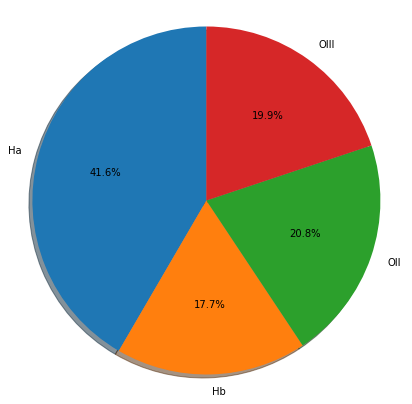

In [6]:
print('Constraint \t\t\t Number of objects')
print('----------------------------------------------------------')
print('At least one emission line: \t%i'%len(cosmos_hst_masked))
print('At least Ha: \t\t\t%i'%len(cosmos_hst_masked[cosmos_hst_masked['Ha_FLUX']> 0]))
print('At least Hb: \t\t\t%i'%len(cosmos_hst_masked[cosmos_hst_masked['Hb_FLUX']> 0]))
print('At least OII:\t\t\t%i'%len(cosmos_hst_masked[cosmos_hst_masked['OII_FLUX']> 0]))
print('At least OIII:\t\t\t%i'%len(cosmos_hst_masked[cosmos_hst_masked['OIII_FLUX']> 0]))
print('----------------------------------------------------------')


#---------------------------------------------------------------------------------------------
#Plot
#---------------------------------------------------------------------------------------------

labels = ['Ha','Hb','OII', 'OIII']
values = [len(cosmos_hst_masked[cosmos_hst_masked['Ha_FLUX']> 0]),\
          len(cosmos_hst_masked[cosmos_hst_masked['Hb_FLUX']> 0]),\
         len(cosmos_hst_masked[cosmos_hst_masked['OII_FLUX']> 0]),\
         len(cosmos_hst_masked[cosmos_hst_masked['OIII_FLUX']> 0])]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

#---------------------------------------------------------------------------------------------
#Saving the masked file
#---------------------------------------------------------------------------------------------

# masked_data = Table.from_pandas(cosmos_hst_masked)

# masked_data.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/COSMOS_3DHST/\
# COSMOS_masked_lines.fits', overwrite=True)

# Crossmatch: HELP + Laigle et al., 2016

This is performed before corssmatching with the 3D-HST data because RA and DEC were taken in both surveys from IRAC positions, so the match should be fine tunned.

As the crossmatching process involves coordinates then it must be performed using TOPCAT instead of PANDAS for convenience.

In [6]:
# In TOPCAT: MIPS is crossmatched to Laigle et al., 2016

# The new sample has the photometric bands from Laigle et., 2016 including the Spitzer 24mu data from HELP

help_MIPS_laigle = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/COSMOS_Laigle/'
                              'help_MIPS_laigle.fits', format = 'fits')

# In TOPCAT: the help_MIPS_laigle.fits file must be once again crossmatched to the masked 3DHST data
# Above (COSMOS_masked_lines.fits) ALPHA_J2000','DELTA_J2000' from Laigle and RA, Dec from HELP_MIPS

help_MIPS_laigle_3dhst = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                                    'help_MIPS_laigle_3dhst.fits', format = 'fits')

# Final sample sanity check

The spectroscopic, photometric or grism redshift reported are checked. Also the position in the sky from the different catlogs merged to guarantee that the TOPCAT crossmatching process went well. The redshift distribution according to the the different emission lines saved are also addressed. 

The APER2 and APER3 values in Laigle et al., 2016 were checked because a correction must be perfomed in order to obtain the corrected total fluxes for each band. 

Final sample:                 			3706
z_spec or z_max_grism and use_zgrism==1: 	2096
z_phot:                				1610


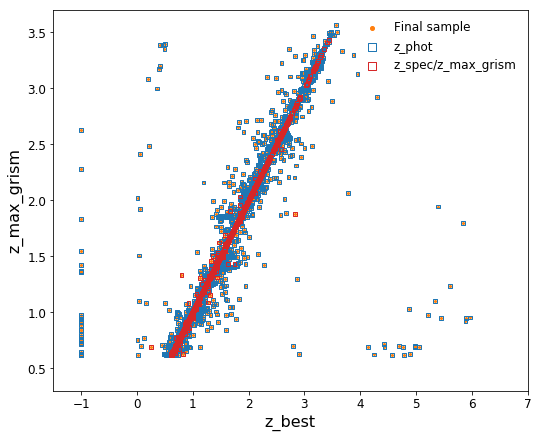

In [7]:
# Checking the redshift behavior

# Masking according to section 3.3 in the 3D-HST Documentation file
mask_1 = help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['use_zgrism'] == 1]
mask_2 = help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['use_zgrism'] < 1]

print('Final sample:                 \t\t\t%i'%len(help_MIPS_laigle_3dhst['use_zgrism']))
print('z_spec or z_max_grism and use_zgrism==1: \t%i'%len(mask_1))
print('z_phot:                \t\t\t\t%i'%len(mask_2))

#---------------------------------------------------------------------------------------------
#Plot
#---------------------------------------------------------------------------------------------

plt.figure(figsize = (8.5,7))
plt.scatter(help_MIPS_laigle_3dhst['z_best'], help_MIPS_laigle_3dhst['z_max_grism'],\
            s = 4, marker = 'o', c = 'C1', label = 'Final sample')
plt.scatter(mask_2['z_best'], mask_2['z_max_grism'],\
            s = 15, marker = 's', facecolors='none', edgecolors='C0', label = 'z_phot')
plt.scatter(mask_1['z_best'], mask_1['z_max_grism'],\
            s = 15, marker = 's', facecolors='none', edgecolors='C3', label = 'z_spec/z_max_grism')
# plt.scatter(help_MIPS_laigle_3dhst['z_best'], help_MIPS_laigle_3dhst['z_spec'],\
#             s = 4, marker = 'x', c = 'k', label = 'Final sample')
plt.xlabel('z_best', fontsize = 16)
plt.ylabel('z_max_grism', fontsize = 16)
plt.xlim(-1.5, 7.0)
plt.ylim(0.3, 3.7)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 2 , loc = 'upper right');

# to check if the 124 objects with z_spec have the same z_best reported
# z_spec = help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['z_spec'] != -1]['z_spec']
# z = help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['z_spec'] != -1]['z_best']
# plt.scatter(z, z_spec)

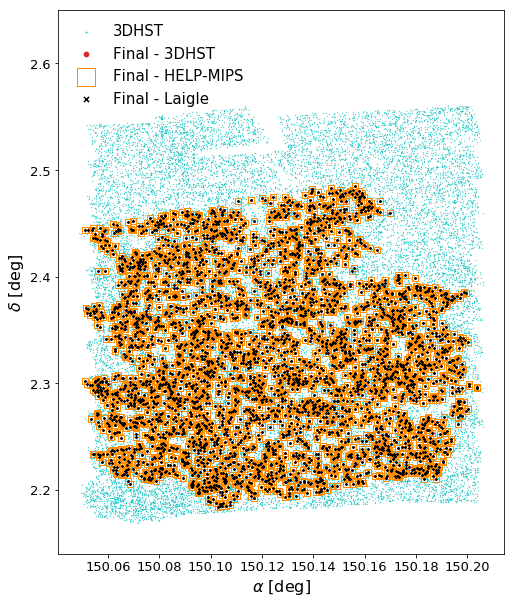

In [8]:
# ra_1, dec_1 from 3DHST
# RA_2, Dec_2 from HELP_MIPS
# ALPHA_J2000, DELTA_J2000 from Laigle et al., 2016

plt.figure(figsize = (8,10))
plt.scatter(cosmos_phot['ra'], cosmos_phot['dec'], marker = '.', s = 0.3, c = 'c', label = '3DHST')
plt.scatter(help_MIPS_laigle_3dhst['ra_1'], help_MIPS_laigle_3dhst['dec_1'], marker = '.', s = 10, c = 'C3', label = 'Final - 3DHST')
plt.scatter(help_MIPS_laigle_3dhst['RA_2'], help_MIPS_laigle_3dhst['Dec_2'], marker = 's',\
            facecolors='none', edgecolors='darkorange', label = 'Final - HELP-MIPS')
plt.scatter(help_MIPS_laigle_3dhst['ALPHA_J2000'], help_MIPS_laigle_3dhst['DELTA_J2000'],\
            marker = 'x', s = 3, c = 'k', label = 'Final - Laigle')
plt.xlabel(r'$\alpha$ [deg]', fontsize = 16)
plt.ylabel(r'$\delta$ [deg]', fontsize = 16)
plt.ylim(2.14,2.65)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'best');

----------------------------------------------------------
At least one emission line: 	3706
At least Ha: 			2415
At least Hb: 			997
At least OII: 			1052
At least OIII: 			1082
----------------------------------------------------------
Ha, Hb: 			 498
Ha, Hb, OII: 			 0
Ha, Hb, OII, OIII: 		 0
----------------------------------------------------------
At least one emission line and 24mu (from Laigle et al., 2016): 

At least Ha:			351
At least Hb:			126
At least OII:			106
At least OIII:			131
----------------------------------------------------------


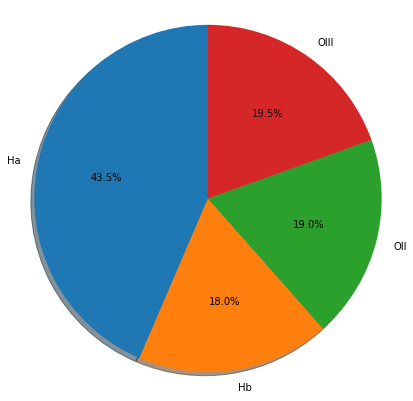

In [83]:
# Checking the number of objects with emission lines and spitzer data

print('----------------------------------------------------------')
print('At least one emission line: \t%i'%len(help_MIPS_laigle_3dhst))
print('At least Ha: \t\t\t%i'%len(help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['Ha_FLUX']> 0]))
print('At least Hb: \t\t\t%i'%len(help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['Hb_FLUX']> 0]))
print('At least OII: \t\t\t%i'%len(help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['OII_FLUX']> 0]))
print('At least OIII: \t\t\t%i'%len(help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['OIII_FLUX']> 0]))
print('----------------------------------------------------------')
print('Ha, Hb: \t\t\t %i'%len(help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['Ha_FLUX']> 0) &\
                                    (help_MIPS_laigle_3dhst['Hb_FLUX']> 0)]))

print('Ha, Hb, OII: \t\t\t %i'%len(help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['Ha_FLUX']> 0) &\
                                    (help_MIPS_laigle_3dhst['Hb_FLUX']> 0) &\
                                    (help_MIPS_laigle_3dhst['OII_FLUX']> 0)]))

print('Ha, Hb, OII, OIII: \t\t %i'%len(help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['Ha_FLUX']> 0) &\
                                    (help_MIPS_laigle_3dhst['Hb_FLUX']> 0) &\
                                    (help_MIPS_laigle_3dhst['OII_FLUX']> 0) &\
                                    (help_MIPS_laigle_3dhst['OIII_FLUX']> 0)]))
print('----------------------------------------------------------')

print('At least one emission line and 24mu (from Laigle et al., 2016): \n')
print('At least Ha:\t\t\t%i'%len(help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['Ha_FLUX']> 0) &\
                                                          (help_MIPS_laigle_3dhst['FLUX_24'] > 0)]))
print('At least Hb:\t\t\t%i'%len(help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['Hb_FLUX']> 0) &\
                                                         (help_MIPS_laigle_3dhst['FLUX_24'] > 0)]))
print('At least OII:\t\t\t%i'%len(help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['OII_FLUX']> 0) &\
                                                          (help_MIPS_laigle_3dhst['FLUX_24'] > 0)]))
print('At least OIII:\t\t\t%i'%len(help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['OIII_FLUX']> 0) &\
                                                            (help_MIPS_laigle_3dhst['FLUX_24'] > 0)]))

print('----------------------------------------------------------')


labels = ['Ha','Hb','OII', 'OIII']
values = [len(help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['Ha_FLUX']> 0]),\
          len(help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['Hb_FLUX']> 0]),\
         len(help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['OII_FLUX']> 0]),\
         len(help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['OIII_FLUX']> 0])]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.


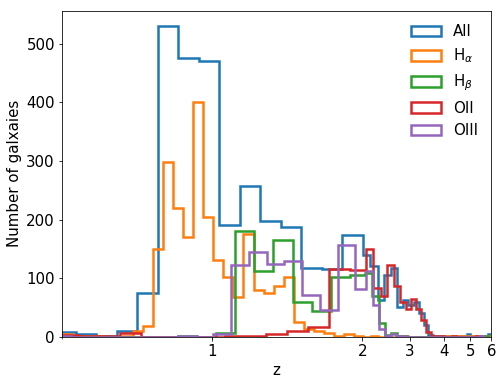

In [84]:
# Emission line fluxes must be positive
Ha   = help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['Ha_FLUX']> 0]
Hb   = help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['Hb_FLUX']> 0]
OII  = help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['OII_FLUX']> 0]
OIII = help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['OIII_FLUX']> 0]


plt.figure(figsize = (7.7,6))
plt.hist(help_MIPS_laigle_3dhst['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = 'All')
plt.hist(Ha['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = r'H$_\alpha$')
plt.hist(Hb['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = r'H$_\beta$')
plt.hist(OII['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = 'OII')
plt.hist(OIII['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = 'OIII')
plt.xlim(0,6)
plt.xscale('symlog')
# plt.yscale('log')
plt.xticks([1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6])
plt.xlabel('z', fontsize = 15)
plt.ylabel('Number of galxaies', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'best');

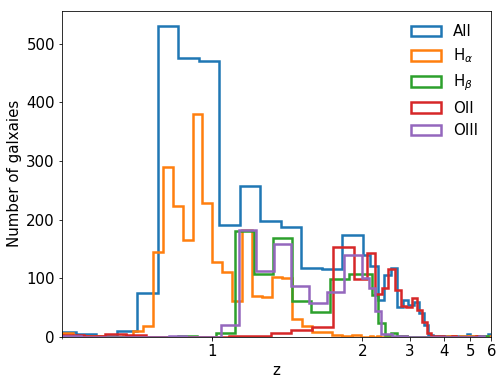

In [85]:
# Emission line fluxes must be positive and redshift must be larger than zero
Ha   = help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['Ha_FLUX']> 0) & (help_MIPS_laigle_3dhst['z_best']> 0)]
Hb   = help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['Hb_FLUX']> 0) & (help_MIPS_laigle_3dhst['z_best']> 0)]
OII  = help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['OII_FLUX']> 0) & (help_MIPS_laigle_3dhst['z_best']> 0)]
OIII = help_MIPS_laigle_3dhst[(help_MIPS_laigle_3dhst['OIII_FLUX']> 0) & (help_MIPS_laigle_3dhst['z_best']> 0)]


plt.figure(figsize = (7.7,6))
plt.hist(help_MIPS_laigle_3dhst['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = 'All')
plt.hist(Ha['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = r'H$_\alpha$')
plt.hist(Hb['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = r'H$_\beta$')
plt.hist(OII['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = 'OII')
plt.hist(OIII['z_best'], bins = 'auto', histtype = 'step', lw = 2.5, label = 'OIII')
plt.xlim(0,6)
plt.xscale('symlog')
# plt.yscale('log')
plt.xticks([1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6])
plt.xlabel('z', fontsize = 15)
plt.ylabel('Number of galxaies', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'best');

In [7]:
# Final sample with redshift measurements of any kind
# Final sample using only positive redshifts
# Final sample with grism measurements

final           = help_MIPS_laigle_3dhst[help_MIPS_laigle_3dhst['z_best'] > 0]
final_best_spec = final[final['use_zgrism'] == 1]

print('Final sample: \t\t\t\t\t%i'%len(help_MIPS_laigle_3dhst['use_zgrism']))
print('Sample with z_best > 0: \t\t\t%i'%len(final['z_best']))
print('Sample with z_best > 0 and z_spec/z_max_grism:  %i'%len(final_best_spec['z_best']))

Final sample: 					3706
Sample with z_best > 0: 			3676
Sample with z_best > 0 and z_spec/z_max_grism:  2096


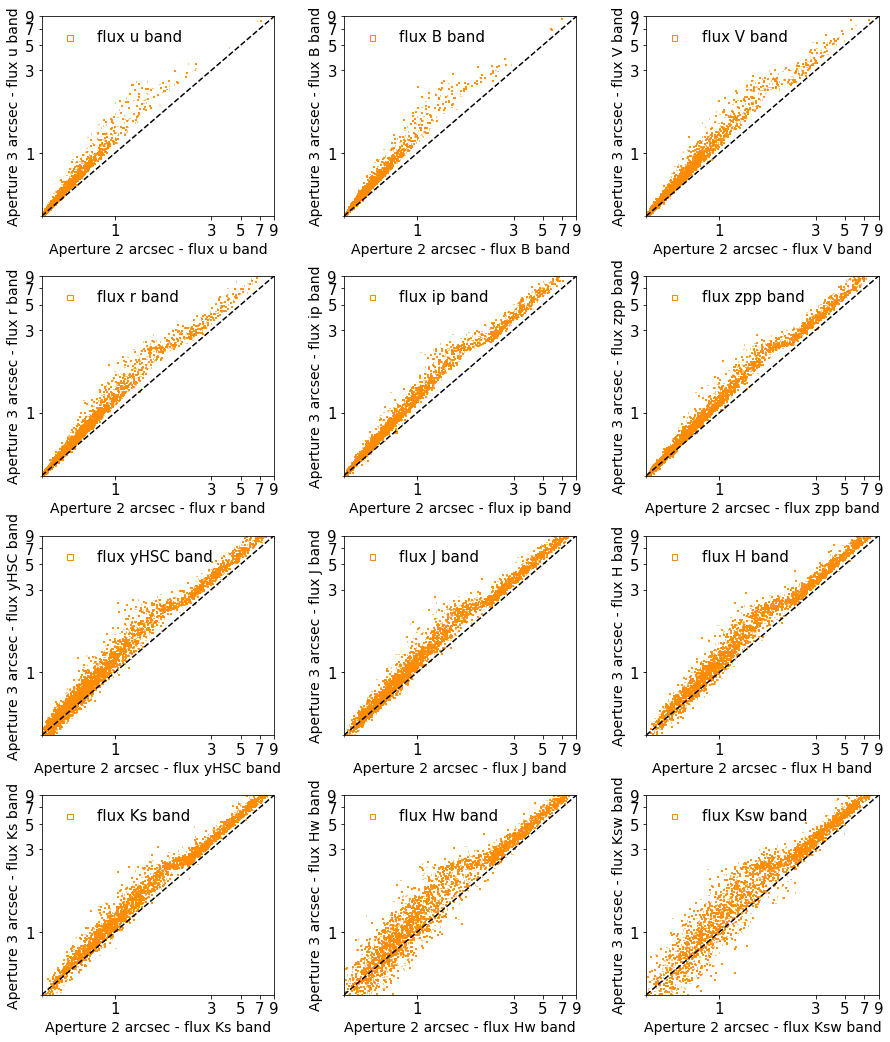

In [9]:
# Checking the Optical-to-NIR bands from Laigle et al., 2016
# There are two apertures (2" and 3"). Extraction is control by the deblending threshold and the flux threshold.
# Flags are included for bad regions and saturated pixels.

x = np.linspace(0, 10, 100)

names       = ['flux u band', 'flux B band','flux V band', 'flux r band',\
               'flux ip band', 'flux zpp band', 'flux yHSC band', 'flux J band',\
               'flux H band', 'flux Ks band', 'flux Hw band', 'flux Ksw band']

Band_aper_2 = ['u_FLUX_APER2', 'B_FLUX_APER2', 'V_FLUX_APER2', 'r_FLUX_APER2',\
               'ip_FLUX_APER2', 'zpp_FLUX_APER2', 'yHSC_FLUX_APER2', 'J_FLUX_APER2',\
               'H_FLUX_APER2', 'Ks_FLUX_APER2', 'Hw_FLUX_APER2', 'Ksw_FLUX_APER2']

Band_aper_3 = ['u_FLUX_APER3', 'B_FLUX_APER3', 'V_FLUX_APER3', 'r_FLUX_APER3',\
               'ip_FLUX_APER3', 'zpp_FLUX_APER3', 'yHSC_FLUX_APER3', 'J_FLUX_APER3',\
               'H_FLUX_APER3', 'Ks_FLUX_APER3', 'Hw_FLUX_APER3', 'Ksw_FLUX_APER3']

fig, axs = plt.subplots(figsize = (15,18), ncols = 3, nrows = 4, sharey = False, facecolor = 'w', edgecolor = 'k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

axs = axs.ravel()

for i in range(len(Band_aper_2)):
    
    axs[i].scatter(help_MIPS_laigle_3dhst[Band_aper_2[i]], help_MIPS_laigle_3dhst[Band_aper_3[i]],\
            s = 0.6, marker = 's', facecolors='none', edgecolors='darkorange', label = names[i])
    axs[i].plot(x, x, ls = '--', c = 'k')
    axs[i].set_xlim(0, 9)
    axs[i].set_ylim(0, 9)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xticks([1, 3, 5, 7, 9])
    axs[i].set_yticks([1, 3, 5, 7, 9])
    axs[i].set_xticklabels([1, 3, 5, 7, 9])
    axs[i].set_yticklabels([1, 3, 5, 7, 9])
    axs[i].set_xlabel(r'Aperture 2 arcsec - %s'%names[i], fontsize = 14)
    axs[i].set_ylabel(r'Aperture 3 arcsec - %s'%names[i], fontsize = 14)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 15)
    axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 7 , loc = 'upper left')

# New HELP sub-sample simplified + 3DHST-Laigle-MIPS

The samples created above are merged into a simple one which contains the HELP data extracted in the begining of this notebook and the 3D-HST, Laigle et al., 2016 and HELP-MIPS data. 

Using TOPCAT the a final samples is created corssmatching the objects in RA and DEC using a 2arcsec crossmatch precision.  

In [8]:
help_simplified   = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                               'COSMOS_HELP/HELP_subsample_merged.fits', format = 'fits')

#In TOPCAT:
# 'HELP_subsample_merged.fits' is corssmatched to 'help_MIPS_laigle_3dhst.fits'
# Final file is composed of Laigle bands and HELP useful bands for the project

help_MIPS_laigle_3dhst_HELPBANDS = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                                              'help_MIPS_laigle_3dhst_HELPBANDS.fits', format = 'fits')

In [9]:
# This correction is needed because I saved the column with the wrong name
# Everything is already corrected above

help_MIPS_laigle_3dhst_HELPBANDS.rename_column('help_f_suprime_zp', 'help_f_suprime_zpp')

In [10]:
# 'NAN' values and -99.0, -99.9 values are changed to -9999.99 to be
# consistent with the final file provided to CIGALE

help_MIPS_laigle_3dhst_HELPBANDS = help_MIPS_laigle_3dhst_HELPBANDS.to_pandas()
help_MIPS_laigle_3dhst_HELPBANDS = help_MIPS_laigle_3dhst_HELPBANDS.fillna(-9999.99)
help_MIPS_laigle_3dhst_HELPBANDS = Table.from_pandas(help_MIPS_laigle_3dhst_HELPBANDS)

help_MIPS_laigle_3dhst_HELPBANDS = help_MIPS_laigle_3dhst_HELPBANDS.to_pandas()
help_MIPS_laigle_3dhst_HELPBANDS = help_MIPS_laigle_3dhst_HELPBANDS.replace(-99.0, -9999.99)
help_MIPS_laigle_3dhst_HELPBANDS = help_MIPS_laigle_3dhst_HELPBANDS.replace(-99.9, -9999.99)
help_MIPS_laigle_3dhst_HELPBANDS = Table.from_pandas(help_MIPS_laigle_3dhst_HELPBANDS)

# Only objects with valid redshifts are measured
help_MIPS_laigle_3dhst_HELPBANDS = help_MIPS_laigle_3dhst_HELPBANDS[help_MIPS_laigle_3dhst_HELPBANDS['z_best'] > 0]
# help_MIPS_laigle_3dhst_HELPBANDS = help_MIPS_laigle_3dhst_HELPBANDS[help_MIPS_laigle_3dhst_HELPBANDS['Ha_FLUX_ERR']/help_MIPS_laigle_3dhst_HELPBANDS['Ha_FLUX'] > 5]

print('Final file length: %i'%len(help_MIPS_laigle_3dhst_HELPBANDS))

Final file length: 3676


In [11]:
# HELP database bands are checked and compared to Laigle et al., 2016
# At this stage, no NUV data from the HELP database was added

Band         = ['u','B','V','r',\
                'i+','z++','Y','J',\
                'H', 'Ks','IRAC1','IRAC2',\
                'IRAC3','IRAC4','24_mic']

Bands_help   = ['help_f_omegacam_u', 'help_f_suprime_b', 'help_f_suprime_v', 'help_f_suprime_r',\
               'help_f_suprime_ip', 'help_f_suprime_zpp', 'help_f_suprime_y', 'help_f_vista_j',\
               'help_f_vista_h', 'help_f_vista_ks', 'help_f_irac_i1', 'help_f_irac_i2',\
               'help_f_irac_i3', 'help_f_irac_i4', 'help_f_mips_24']

Bands_Laigle = ['u_FLUX_APER3', 'B_FLUX_APER3', 'V_FLUX_APER3', 'r_FLUX_APER3',\
               'ip_FLUX_APER3', 'zpp_FLUX_APER3', 'yHSC_FLUX_APER3', 'J_FLUX_APER3',\
               'H_FLUX_APER3', 'Ks_FLUX_APER3', 'SPLASH_1_FLUX', 'SPLASH_2_FLUX',\
               'SPLASH_3_FLUX', 'SPLASH_4_FLUX', 'F_MIPS_24']

print('--------------------------------------------------------')
print('\t\t HELP \t\t Laigle et al., 2016')
print('--------------------------------------------------------')
laigle_band = help_MIPS_laigle_3dhst_HELPBANDS[help_MIPS_laigle_3dhst_HELPBANDS['FLUXERR_GALEX_NUV'] != -9999.99]
print('%s \t\t %s \t %i'%('NUV', 'No data', len(laigle_band)))

for i in range(len(Bands_help)):
    help_band   = help_MIPS_laigle_3dhst_HELPBANDS[help_MIPS_laigle_3dhst_HELPBANDS[Bands_help[i]] != -9999.99]
    laigle_band = help_MIPS_laigle_3dhst_HELPBANDS[help_MIPS_laigle_3dhst_HELPBANDS[Bands_Laigle[i]] != -9999.99]
    print('%s \t\t %i \t\t %i'%(Band[i], len(help_band), len(laigle_band)))
    
print('--------------------------------------------------------')

--------------------------------------------------------
		 HELP 		 Laigle et al., 2016
--------------------------------------------------------
NUV 		 No data 	 1699
u 		 1552 		 3673
B 		 3645 		 3673
V 		 3639 		 3671
r 		 3450 		 3674
i+ 		 3670 		 3674
z++ 		 3631 		 3676
Y 		 3654 		 3673
J 		 3660 		 3672
H 		 3655 		 3671
Ks 		 3665 		 3674
IRAC1 		 0 		 3667
IRAC2 		 0 		 3668
IRAC3 		 0 		 3593
IRAC4 		 0 		 3670
24_mic 		 3676 		 3676
--------------------------------------------------------


# Error Propagation

MAG_AUTO can be used directly to compute the total flux. This was performed in the HELP database. However, as suggested by Laigle et al., 2016, one shoud first correct every band and use both MAG_AUTO and MAG_APER3 to obtain the total magnitudes and total fluxes. The MAG_AUTO values can be noisier for fainter sources producing biased data if one wants to obtain the photometric redshifts. In general, the total fluxes should be the same and only different for the faintest sources. 

In [12]:
# Checking UVista and UD flags because depending on this flag 
# different errors must be propagated according to the procedure in Laigle et al., 2016

Uvista_inside  = help_MIPS_laigle_3dhst_HELPBANDS[help_MIPS_laigle_3dhst_HELPBANDS['FLAG_HJMCC'] == 0]
Uvista_outside = help_MIPS_laigle_3dhst_HELPBANDS[help_MIPS_laigle_3dhst_HELPBANDS['FLAG_HJMCC'] >= 1]

Ultra_deep     = help_MIPS_laigle_3dhst_HELPBANDS[help_MIPS_laigle_3dhst_HELPBANDS['FLAG_DEEP'] == 1]
Deep           = help_MIPS_laigle_3dhst_HELPBANDS[help_MIPS_laigle_3dhst_HELPBANDS['FLAG_DEEP'] == 0]

print('Inside UVista: %i \t\t Outside UVista: %i'%(len(Uvista_inside), len(Uvista_outside)))
print('UD: %i \t\t\t Deep: %i'%(len(Ultra_deep), len(Deep)))

Inside UVista: 3670 		 Outside UVista: 6
UD: 3640 			 Deep: 36


In [13]:
# Aperture magnitudes must be corrected (MAG_APER3)
# Following appendix 2 in Laigle et al., 2016

#NOTE: this procedure can be avoided if one used MAG_AUTO. However, this measurements are 
# noisier than the ones computed using MAG_APER3 which must be taken into account for photometric redshift
# calculations. The total fluxes must not be too different, only for the faintest sources. 

flux_aper      =   ['u_FLUX_APER3', 'B_FLUX_APER3', 'V_FLUX_APER3', 'r_FLUX_APER3',\
                    'ip_FLUX_APER3', 'zpp_FLUX_APER3', 'yHSC_FLUX_APER3', 'J_FLUX_APER3',\
                    'H_FLUX_APER3', 'Ks_FLUX_APER3', 'Hw_FLUX_APER3', 'Ksw_FLUX_APER3']

fluxerr_aper   =   ['u_FLUXERR_APER3', 'B_FLUXERR_APER3', 'V_FLUXERR_APER3', 'r_FLUXERR_APER3',\
                    'ip_FLUXERR_APER3', 'zpp_FLUXERR_APER3', 'yHSC_FLUXERR_APER3', 'J_FLUXERR_APER3',\
                    'H_FLUXERR_APER3', 'Ks_FLUXERR_APER3', 'Hw_FLUXERR_APER3', 'Ksw_FLUXERR_APER3']

mag_auto       =   ['u_MAG_AUTO', 'B_MAG_AUTO', 'V_MAG_AUTO', 'r_MAG_AUTO',\
                    'ip_MAG_AUTO', 'zpp_MAG_AUTO', 'yHSC_MAG_AUTO', 'J_MAG_AUTO',\
                    'H_MAG_AUTO', 'Ks_MAG_AUTO', 'Hw_MAG_AUTO', 'Ksw_MAG_AUTO']

mag_auto_sigma =   ['u_MAGERR_AUTO', 'B_MAGERR_AUTO', 'V_MAGERR_AUTO', 'r_MAGERR_AUTO',\
                    'ip_MAGERR_AUTO', 'zpp_MAGERR_AUTO', 'yHSC_MAGERR_AUTO', 'J_MAGERR_AUTO',\
                    'H_MAGERR_AUTO', 'Ks_MAGERR_AUTO', 'Hw_MAGERR_AUTO', 'Ksw_MAGERR_AUTO']

mag_aper       =   ['u_MAG_APER3', 'B_MAG_APER3', 'V_MAG_APER3', 'r_MAG_APER3',\
                    'ip_MAG_APER3', 'zpp_MAG_APER3', 'yHSC_MAG_APER3', 'J_MAG_APER3',\
                    'H_MAG_APER3', 'Ks_MAG_APER3', 'Hw_MAG_APER3', 'Ksw_MAG_APER3']

mag_aper_sigma =   ['u_MAGERR_APER3', 'B_MAGERR_APER3', 'V_MAGERR_APER3', 'r_MAGERR_APER3',\
                    'ip_MAGERR_APER3', 'zpp_MAGERR_APER3', 'yHSC_MAGERR_APER3', 'J_MAGERR_APER3',\
                    'H_MAGERR_APER3', 'Ks_MAGERR_APER3', 'Hw_MAGERR_APER3', 'Ksw_MAGERR_APER3']

# Laigle et al., 2016 table 3, page 8
systematic_offset_perband   = [0.010, 0.146, -0.117, -0.012,\
                               0.020, -0.084, -0.014, 0.017,\
                               0.055, -0.001, -0.031, 0.068]

foreground_extinction       = [4.660, 4.020, 3.117, 2.660,\
                               1.991, 1.461, 1.298, 0.871,\
                               0.563, 0.364, 0.563, 0.364]

systematic_uncertainty_UD   = [3.3, 1.8, 1.9, 1.7,\
                               1.7, 2.9, 2.7, 3.3,\
                               3.1, 3.1, 3.2, 3.4]

systematic_uncertainty_Deep = [3.3, 1.8, 1.9, 1.7,\
                               1.7, 2.9, 2.7, 2.9,\
                               2.9, 2.6, 3.2, 3.4]

# Number of measurements. Number of bands involved
N = len(help_MIPS_laigle_3dhst_HELPBANDS)
D = len(flux_aper)

# Propagating errors for MAG_APER3 total and total FLUX

In [14]:
#===================================================================================================================
# Correcting the magnitudes
#===================================================================================================================

W_i    = []
Mag_Wi = []
for j in range(len(help_MIPS_laigle_3dhst_HELPBANDS)):
    
    weights         = 0.0
    mag_weights     = 0.0
    
    for i in range(len(flux_aper)):
        
        sigma_auto  = help_MIPS_laigle_3dhst_HELPBANDS[mag_auto_sigma[i]][j]
        sigma_aper  = help_MIPS_laigle_3dhst_HELPBANDS[mag_aper_sigma[i]][j]
    
        mag_auto_1  = help_MIPS_laigle_3dhst_HELPBANDS[mag_auto[i]][j]
        mag_aper_1  = help_MIPS_laigle_3dhst_HELPBANDS[mag_aper[i]][j]
    
        mag_diff    = mag_auto_1 - mag_aper_1
    
        w_i         = 1.0 / (sigma_auto**2 + sigma_aper**2)
        weights     = weights + w_i
    
        mag_w_i     = mag_diff * w_i
        mag_weights = mag_weights + mag_w_i
        
    W_i.append(weights)    
    Mag_Wi.append(mag_weights)
    
# The offsets from Laigle et al., 2016 are used. Above's procedure is not needed.    
photometric_offset_mag_mine = np.multiply( np.divide(1.0, W_i), Mag_Wi )
photometric_offset_mag      = help_MIPS_laigle_3dhst_HELPBANDS['OFFSET']

magnitudes_corrected   = np.zeros((N,D))

for j in range(len(help_MIPS_laigle_3dhst_HELPBANDS)):
    for i in range(len(systematic_offset_perband)):
    
        mag_aper_perband  = help_MIPS_laigle_3dhst_HELPBANDS[mag_aper[i]][j]
    
        mag_total = mag_aper_perband + photometric_offset_mag[j] - systematic_offset_perband[i] -\
                    help_MIPS_laigle_3dhst_HELPBANDS['EBV'][j]*foreground_extinction[i]
    
        magnitudes_corrected[j][i] = mag_total
                

corrected_mag_err        = np.zeros((N,D))
for j in range(len(help_MIPS_laigle_3dhst_HELPBANDS)):
    for i in range(len(systematic_offset_perband)):
        
        err_aper3 = help_MIPS_laigle_3dhst_HELPBANDS[mag_aper_sigma[i]][j]

        err_total = err_aper3
#         err_total = np.sqrt(err_aper3**2 + 0.0257**2*foreground_extinction[i]**2)
#         err_total = np.sqrt(err_aper3**2 + (0.15*help_MIPS_laigle_3dhst_HELPBANDS['EBV'][j])**2*help_MIPS_laigle_3dhst_HELPBANDS['EBV'][j]**2)
#         err_total = np.sqrt(err_aper3**2 + 0.0257**2*foreground_extinction[i]**2+\
#                            (0.15*help_MIPS_laigle_3dhst_HELPBANDS['EBV'][j])**2*help_MIPS_laigle_3dhst_HELPBANDS['EBV'][j]**2)

        corrected_mag_err[j][i] = err_total       

#Same as the one I compute but with a for loop to check python
# corrected_fluxes        = np.zeros((N,D))
# corrected_fluxes_err    = np.zeros((N,D))
# for j in range(len(help_MIPS_laigle_3dhst_HELPBANDS)):
#     for i in range(len(systematic_offset_perband)):
        
#         mag      = magnitudes_corrected[j][i]
#         mag_err  = corrected_mag_err[j][i]
        
#         flux     = ( 10**( (8.9 - mag)/2.5 ) )
#         flux_err = np.log(10) * flux * mag_err
        
#         corrected_fluxes[j][i]     = flux
#         corrected_fluxes_err[j][i] = flux_err


# Fluxes are retrieved in Jy     
corrected_fluxes       = ( 10**( (8.9 - magnitudes_corrected)/2.5 ) )
corrected_fluxes_err   =  corrected_mag_err * corrected_fluxes * ( np.log(10)/2.5 )

# Fluxes are added in µJy
corrected_fluxes       = corrected_fluxes*1e6
corrected_fluxes_err   = corrected_fluxes_err*1e6

# print('flux')
# print(corrected_fluxes[0])
# print('flux_err')
# print(corrected_fluxes_err[0])

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in power


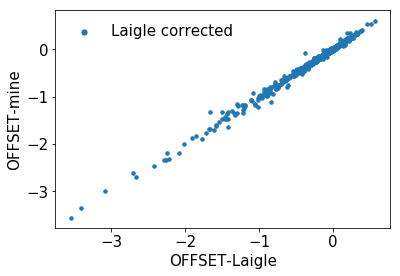

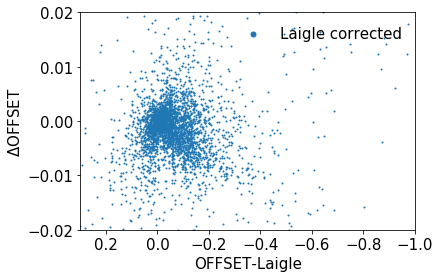

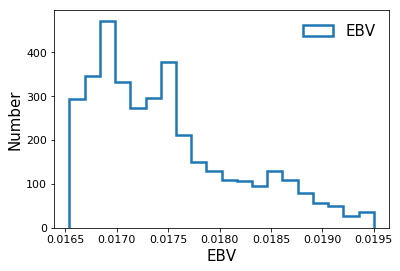

In [17]:
# Checking the offset I computed and Laigle et al., 2016 offsets
# Also checking the EBV distribution

plt.figure()
plt.scatter(help_MIPS_laigle_3dhst_HELPBANDS['OFFSET'],\
            photometric_offset_mag_mine, label = 'Laigle corrected', s = 12)
plt.xlabel('OFFSET-Laigle', fontsize = 15)
plt.ylabel('OFFSET-mine', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'best');

plt.figure()
plt.scatter(help_MIPS_laigle_3dhst_HELPBANDS['OFFSET'],\
           (help_MIPS_laigle_3dhst_HELPBANDS['OFFSET']-photometric_offset_mag_mine),\
            label = 'Laigle corrected', s = 1)
plt.ylabel(r'$\Delta$OFFSET', fontsize = 15)
plt.xlabel('OFFSET-Laigle', fontsize = 15)
plt.ylim(-0.02, 0.02)
plt.xlim(0.3, -1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 5 , loc = 'best');

plt.figure()
plt.hist(help_MIPS_laigle_3dhst_HELPBANDS['EBV'], bins = 20, histtype = 'step', lw = 2.5, label = 'EBV')
plt.ylabel('Number', fontsize = 15)
plt.xlabel('EBV', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 11)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 5 , loc = 'best');

# Saving and writing down the total Magnitudes and total Fluxes

In [15]:
# Sending the total mag per band into an array

mag_total       =   ['u_MAG_TOT', 'B_MAG_TOT', 'V_MAG_TOT', 'r_MAG_TOT',\
                    'ip_MAG_TOT', 'zpp_MAG_TOT', 'yHSC_MAG_TOT', 'J_MAG_TOT',\
                    'H_MAG_TOT', 'Ks_MAG_TOT', 'Hw_MAG_TOT', 'Ksw_MAG_TOT']

index = [help_MIPS_laigle_3dhst_HELPBANDS['help_id_1'][i] for i in range(len(help_MIPS_laigle_3dhst_HELPBANDS))]

df = pd.DataFrame(magnitudes_corrected, index=index, columns =mag_total, dtype = 'float64')


# Saving the total flux and total flux err per band
flux_total      =   ['u_FLUX_TOT', 'B_FLUX_TOT', 'V_FLUX_TOT', 'r_FLUX_TOT',\
                    'ip_FLUX_TOT', 'zpp_FLUX_TOT', 'yHSC_FLUX_TOT', 'J_FLUX_TOT',\
                    'H_FLUX_TOT', 'Ks_FLUX_TOT', 'Hw_FLUX_TOT', 'Ksw_FLUX_TOT']

flux_total_err  =   ['u_FLUX_TOT_err', 'B_FLUX_TOT_err', 'V_FLUX_TOT_err', 'r_FLUX_TOT_err',\
                    'ip_FLUX_TOT_err', 'zpp_FLUX_TOT_err', 'yHSC_FLUX_TOT_err', 'J_FLUX_TOT_err',\
                    'H_FLUX_TOT_err', 'Ks_FLUX_TOT_err', 'Hw_FLUX_TOT_err', 'Ksw_FLUX_TOT_err']

index_1 = [help_MIPS_laigle_3dhst_HELPBANDS['help_id_1'][i] for i in range(len(help_MIPS_laigle_3dhst_HELPBANDS))]

df_1   = pd.DataFrame(corrected_fluxes, index=index_1, columns =flux_total, dtype = 'float64')
df_2   = pd.DataFrame(corrected_fluxes_err, index=index_1, columns =flux_total_err, dtype = 'float64')

fluxes_corrected = pd.concat([df_1, df_2], axis=1, sort=False)

In [16]:
# New total fluxes are added to the original merged and crossmatched table
# A new table is saved as 'final_sample.fits'

fluxes_laigle_corrected = Table.from_pandas(fluxes_corrected)
fluxes_laigle_corrected = Table.to_pandas(fluxes_laigle_corrected)

original_laigle_sample  = help_MIPS_laigle_3dhst_HELPBANDS.to_pandas()

final_sample = pd.concat([original_laigle_sample, fluxes_laigle_corrected], axis=1, sort=False)

final_sample = Table.from_pandas(final_sample)

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/final_sample.fits')
final_sample.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/final_sample.fits')

# Adding GALEX data from HELP
# Checking Laigle et al., 2016 and HELP data

In [17]:
sample       = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                          'CIGALE_file/final_sample.fits', format = 'fits')

sample_GALEX = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                          'COSMOS/CIGALE_file/final_sample_GALEX_2arcsec.fits', format = 'fits')

Data in GALEX Laigle: 66
Data in GALEX HELP:  69


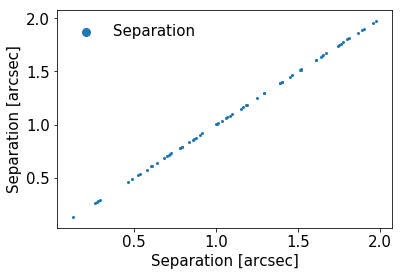

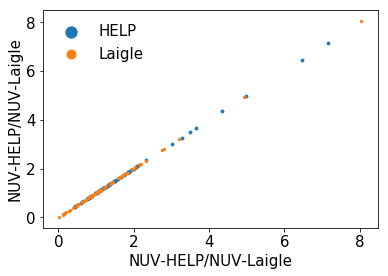

In [103]:
#GALEX data from HELP is not so good, so I will use Laigle et al., 2016 values

print('Data in GALEX Laigle: %i'%len(sample_GALEX['FLUX_GALEX_NUV'][sample_GALEX['FLUX_GALEX_NUV']>0]))
print('Data in GALEX HELP:  %i'%len(sample_GALEX['flux_nuv'][sample_GALEX['flux_nuv']>0]))

plt.figure()
plt.scatter(sample_GALEX['Separation'], sample_GALEX['Separation'], s = 4)
plt.xlabel('Separation [arcsec]', fontsize = 15)
plt.ylabel('Separation [arcsec]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 4 , loc = 'upper left');

plt.figure()
plt.scatter(sample_GALEX['flux_nuv'][sample_GALEX['flux_nuv']>0],\
            sample_GALEX['flux_nuv'][sample_GALEX['flux_nuv']>0], s = 8, label = 'HELP')
plt.scatter(sample_GALEX['FLUX_GALEX_NUV'][sample_GALEX['FLUX_GALEX_NUV']>0],\
            sample_GALEX['FLUX_GALEX_NUV'][sample_GALEX['FLUX_GALEX_NUV']>0], s = 5, label = 'Laigle')
plt.xlabel('NUV-HELP/NUV-Laigle', fontsize = 15)
plt.ylabel('NUV-HELP/NUV-Laigle', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 4 , loc = 'upper left');

In [18]:
# Data in Laigle et al., 2016 and HELP per band
# Only objects with measurements larger than zero are kept

names       = ['flux u band', 'flux B band','flux V band', 'flux r band',\
               'flux ip band', 'flux zpp band', 'flux yHSC band', 'flux J band',\
               'flux H band', 'flux Ks band', 'flux IRAC1 band', 'flux IRAC2 band',\
               'flux IRAC3 band', 'flux IRAC4 band', 'flux 24um band']

Band_Laigle = ['u_FLUX_TOT', 'B_FLUX_TOT', 'V_FLUX_TOT', 'r_FLUX_TOT',\
               'ip_FLUX_TOT', 'zpp_FLUX_TOT', 'yHSC_FLUX_TOT', 'J_FLUX_TOT',\
               'H_FLUX_TOT', 'Ks_FLUX_TOT', 'SPLASH_1_FLUX', 'SPLASH_2_FLUX',\
               'SPLASH_3_FLUX', 'SPLASH_4_FLUX', 'FLUX_24']

Band_help   = ['help_f_omegacam_u', 'help_f_suprime_b', 'help_f_suprime_v', 'help_f_suprime_r',\
               'help_f_suprime_ip', 'help_f_suprime_zpp', 'help_f_suprime_y', 'help_f_vista_j',\
               'help_f_vista_h', 'help_f_vista_ks', 'help_f_irac_i1', 'help_f_irac_i2',\
               'help_f_irac_i3', 'help_f_irac_i4', 'help_f_mips_24']


print('----------------------------------------------------------------------------------------------------------')
print('Band\t\t\t Laigle_non_zero \t\t HELP_non_zero')
print('----------------------------------------------------------------------------------------------------------')

for i in range(1, len(names)):
    
    Laigle            = final_sample[Band_Laigle[i]]
    L_Non_zero        = final_sample[Band_Laigle[i]][ final_sample[Band_Laigle[i]] > 0]
    HELP              = final_sample[Band_help[i]]
    H_Non_zero        = final_sample[Band_help[i]][final_sample[Band_help[i]] > 0]
    
    if len(Laigle) != len(HELP):
        print('Let op! Something went wrong!')
    
    print('%s\t\t\t %i \t\t\t %i'%\
          (names[i], len(L_Non_zero), len(H_Non_zero)))
    
    del(Laigle, L_Non_zero, HELP, H_Non_zero)

print('----------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------')


----------------------------------------------------------------------------------------------------------
Band			 Laigle_non_zero 		 HELP_non_zero
----------------------------------------------------------------------------------------------------------
flux B band			 3676 			 3645
flux V band			 3676 			 3639
flux r band			 3676 			 3450
flux ip band			 3676 			 3670
flux zpp band			 3676 			 3631
flux yHSC band			 3676 			 3654
flux J band			 3676 			 3660
flux H band			 3676 			 3655
flux Ks band			 3676 			 3665
flux IRAC1 band			 3666 			 0
flux IRAC2 band			 3666 			 0
flux IRAC3 band			 2362 			 0
flux IRAC4 band			 884 			 0
flux 24um band			 492 			 3676
----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------


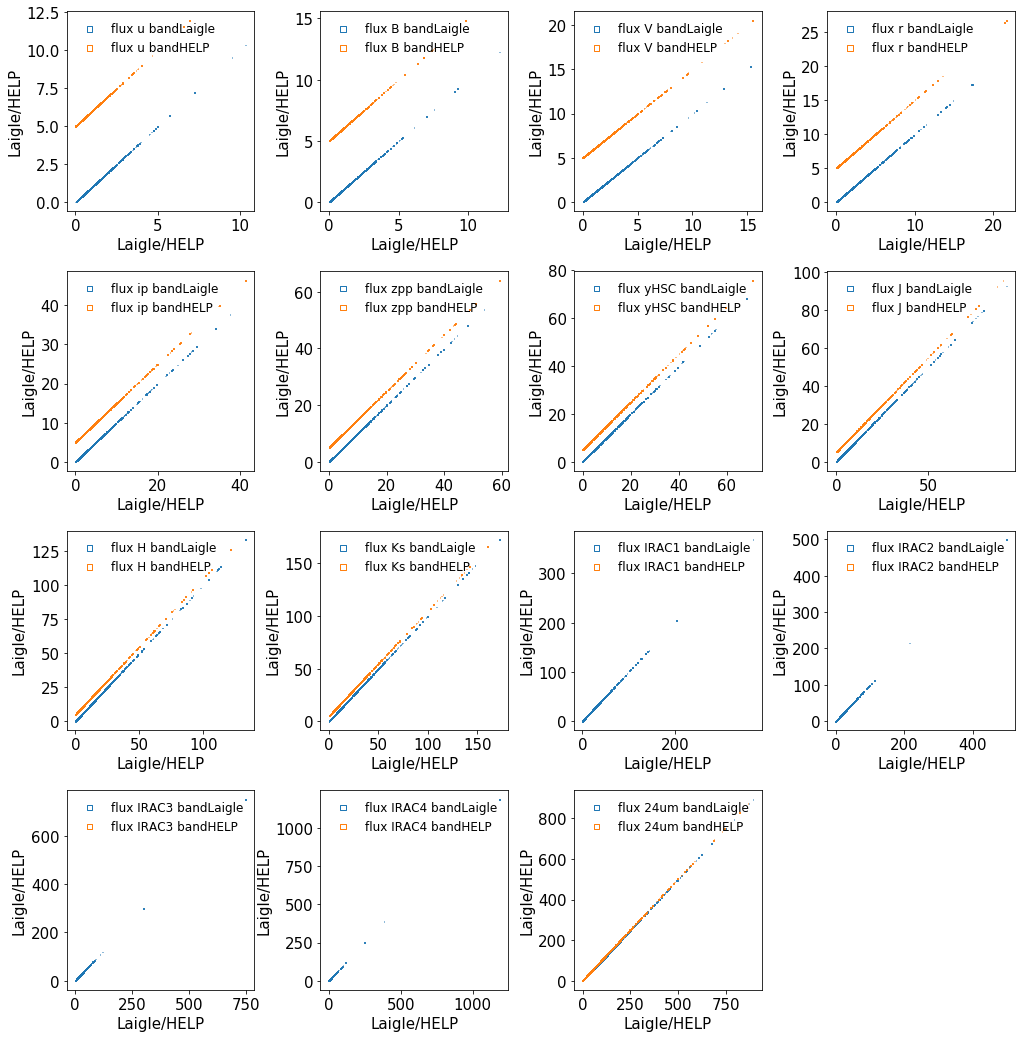

In [106]:
# Comparing Laigle et al., 2016 bands just for the scale
# To check units and range

fig, axs = plt.subplots(figsize = (17, 18), ncols = 4, nrows = 4, sharey = False, facecolor = 'w', edgecolor = 'k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.35)
axs[-1, -1].axis('off')

axs = axs.ravel()

for i in range(len(names)):
       
    data = final_sample
    x    = data[Band_Laigle[i]][ data[Band_Laigle[i]] > 0]
    y    = data[Band_help[i]][ data[Band_help[i]] > 0]
    
    #Transform flux_24 from mJY to uJy
    if (i == len(names) -1):
        data = final_sample
        x    = data[Band_Laigle[i]][ (data[Band_Laigle[i]] > 0) & (data[Band_Laigle[i]] < 1000)]
        y    = data[Band_help[i]][ (data[Band_help[i]] > 0) & (data[Band_help[i]] < 1000)]
    
    axs[i].scatter(x, x,\
                   s = 0.6, marker = 's', facecolors='none', edgecolors='C0', label = names[i]+'Laigle')
    
    axs[i].scatter(y, y + 5.0,\
                   s = 0.6, marker = 's', facecolors='none', edgecolors='C1', label = names[i]+'HELP')
    
#     axs[i].set_xlim(np.nanpercentile(x, 0.1), np.nanpercentile(x, 99.9))
#     axs[i].set_ylim(np.nanpercentile(x, 0.1), np.nanpercentile(x, 99.9))
    
    axs[i].set_xlabel(r'Laigle/HELP', fontsize = 15)
    axs[i].set_ylabel(r'Laigle/HELP', fontsize = 15)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 15)
    axs[i].legend(frameon = False, prop = {'size': 12}, markerscale = 7 , loc = 'upper left')

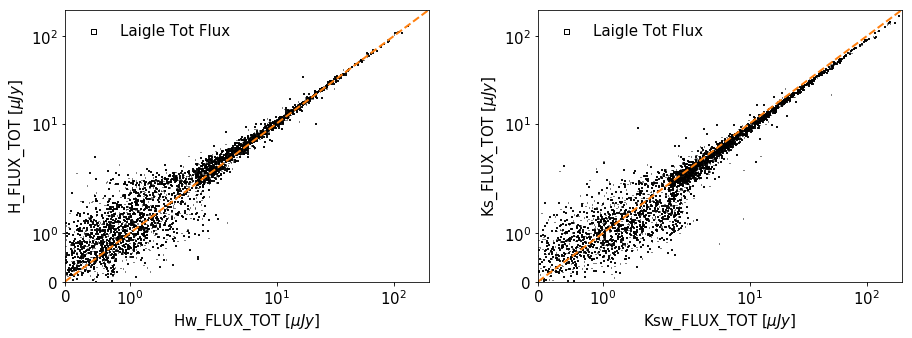

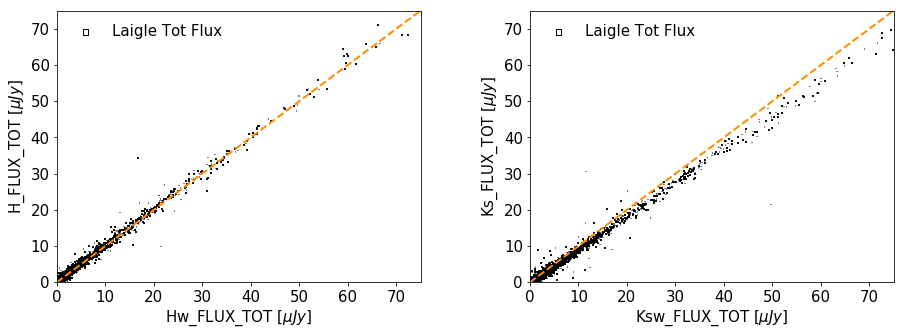

In [21]:
#===================================================================================================================
#Comparing WIRcam and UVista H and Ks bands after computing total fluxes
#===================================================================================================================

WIRCam_bands        = ['Hw_FLUX_TOT', 'Ksw_FLUX_TOT']
UVista_bands        = ['H_FLUX_TOT', 'Ks_FLUX_TOT']

X = np.linspace(0, 250, 100)

fig, axs = plt.subplots(figsize = (15, 5), ncols = 2, nrows = 1, sharey = False, facecolor = 'w', edgecolor = 'k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

axs = axs.ravel()

for i in range(len(WIRCam_bands)):
    
    data = final_sample
    x    = data[WIRCam_bands[i]]
    y    = data[UVista_bands[i]]
    
    axs[i].scatter(x, y, s= 0.6, marker ='s', facecolors='none', edgecolors='k', label = 'Laigle Tot Flux')
    axs[i].plot(X, X, '--', lw = 2, c = 'C1')
    axs[i].set_xlabel(r'%s [$\mu Jy$]'%WIRCam_bands[i], fontsize = 15)
    axs[i].set_ylabel(r'%s [$\mu Jy$]'%UVista_bands[i], fontsize = 15)
    axs[i].set_xlim(0, 200)
    axs[i].set_ylim(0, 200)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 15)
    axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 7 , loc = 'upper left')
    
    
fig, axs = plt.subplots(figsize = (15, 5), ncols = 2, nrows = 1, sharey = False, facecolor = 'w', edgecolor = 'k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

axs = axs.ravel()

for i in range(len(WIRCam_bands)):
    
    data = final_sample
    x    = data[WIRCam_bands[i]]
    y    = data[UVista_bands[i]]
    
    axs[i].scatter(x, y, s= 0.6, marker ='s', facecolors='none', edgecolors='k', label = 'Laigle Tot Flux')
    axs[i].plot(X, X, '--', lw = 2, c = 'darkorange')
    axs[i].set_xlabel(r'%s [$\mu Jy$]'%WIRCam_bands[i], fontsize = 15)
    axs[i].set_ylabel(r'%s [$\mu Jy$]'%UVista_bands[i], fontsize = 15)
    axs[i].set_xlim(0, 75)
    axs[i].set_ylim(0, 75)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 15)
    axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 7 , loc = 'upper left')    


# Checking UVista and UD flags
# Checking Final Sample

In [19]:
Uvista_inside  = sample[sample['FLAG_HJMCC'] == 0]
Uvista_outside = sample[sample['FLAG_HJMCC'] >= 1]

Ultra_deep     = sample[sample['FLAG_DEEP'] == 1]
Deep           = sample[sample['FLAG_DEEP'] == 0]

print('Inside UVista: %i \t\t Outside UVista: %i'%(len(Uvista_inside), len(Uvista_outside)))
print('UD: %i \t\t\t Deep: %i'%(len(Ultra_deep), len(Deep)))

print('-----------------------------------------------------------------------------------------------------------')

print('GALEX Sample')
Uvista_inside  = sample_GALEX[sample_GALEX['FLAG_HJMCC'] == 0]
Uvista_outside = sample_GALEX[sample_GALEX['FLAG_HJMCC'] >= 1]

Ultra_deep     = sample_GALEX[sample_GALEX['FLAG_DEEP'] == 1]
Deep           = sample_GALEX[sample_GALEX['FLAG_DEEP'] == 0]

print('Inside UVista: %i \t\t Outside UVista: %i'%(len(Uvista_inside), len(Uvista_outside)))
print('UD: %i \t\t\t\t Deep: %i'%(len(Ultra_deep), len(Deep)))

Inside UVista: 3670 		 Outside UVista: 6
UD: 3640 			 Deep: 36
-----------------------------------------------------------------------------------------------------------
GALEX Sample
Inside UVista: 68 		 Outside UVista: 1
UD: 69 				 Deep: 0


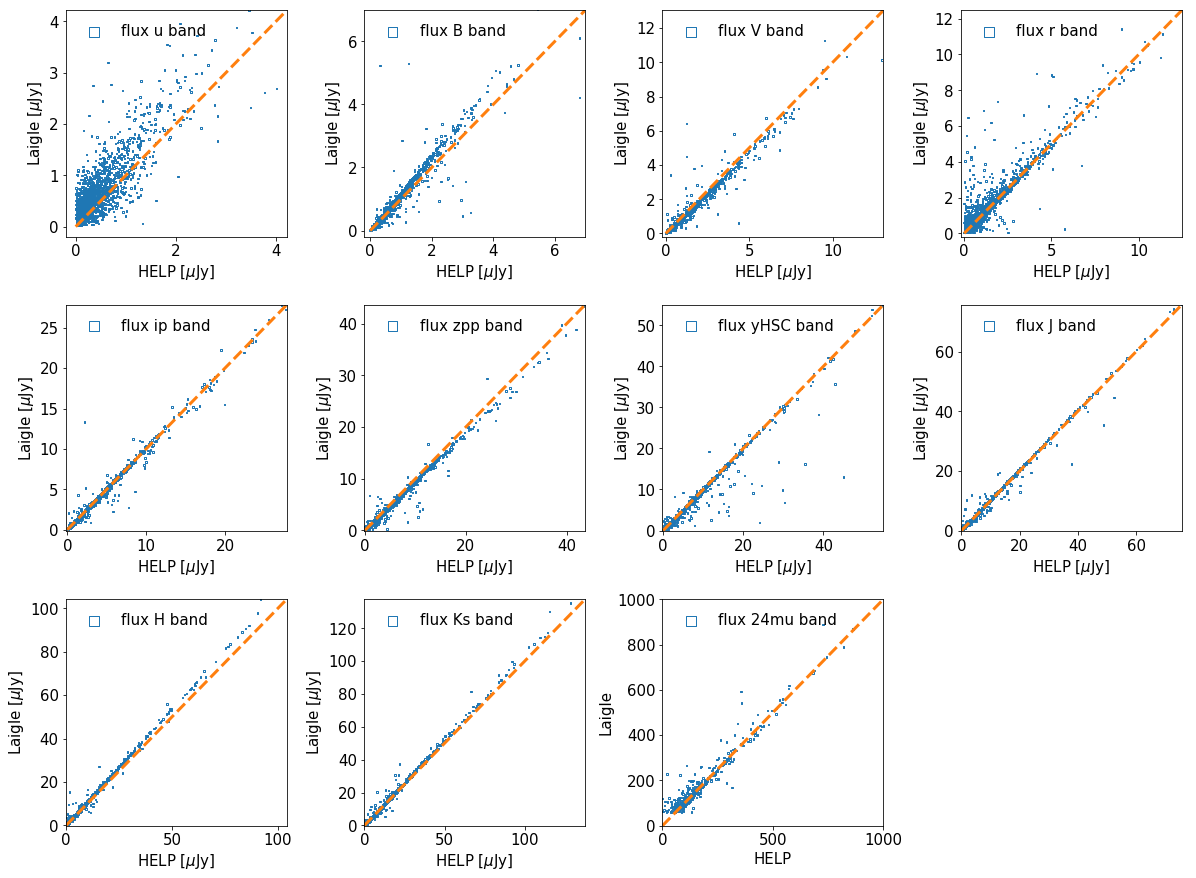

In [24]:
# Total flux in Laigle et al., 2016 versus HELP data

X = np.linspace(0, 1000, 100)

fig, axs = plt.subplots(figsize = (20, 15), ncols = 4, nrows = 3, sharey = False, facecolor = 'w', edgecolor = 'k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.35)
axs[-1, -1].axis('off')

axs = axs.ravel()

for i in range(11):
    
    if i != 10:
        x    = help_MIPS_laigle_3dhst_HELPBANDS[Band_help[i]]
        y    = fluxes_corrected[Band_Laigle[i]]
    
        axs[i].scatter(x, y,\
                       s = 2.0, marker = 's', facecolors='none', edgecolors='C0', label = names[i])
        axs[i].plot(X, X, ls = '--', lw = 3, c = 'C1')

    
        axs[i].set_xlim(-0.2 , np.nanpercentile(x, 99.9))
        axs[i].set_ylim(-0.2, np.nanpercentile(x, 99.9))
    
        axs[i].set_xlabel(r'HELP [$\mu$Jy]', fontsize = 15)
        axs[i].set_ylabel(r'Laigle [$\mu$Jy]', fontsize = 15)
        axs[i].tick_params(axis = 'both', which = 'major', labelsize = 15)
        axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 7 , loc = 'upper left')
    
    if i == 10:
        x = help_MIPS_laigle_3dhst_HELPBANDS['help_f_mips_24']
        y = help_MIPS_laigle_3dhst_HELPBANDS['FLUX_24']
    
        axs[i].scatter(x, y,\
                       s = 2.0, marker = 's', facecolors='none', edgecolors='C0', label = 'flux 24mu band')
        axs[i].plot(X, X, ls = '--', lw = 3, c = 'C1')

    
        axs[i].set_xlim(-0.2 , 1000)
        axs[i].set_ylim(-0.2, 1000)
    
        axs[i].set_xlabel(r'HELP', fontsize = 15)
        axs[i].set_ylabel(r'Laigle', fontsize = 15)
        axs[i].tick_params(axis = 'both', which = 'major', labelsize = 15)
        axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 7 , loc = 'upper left') 

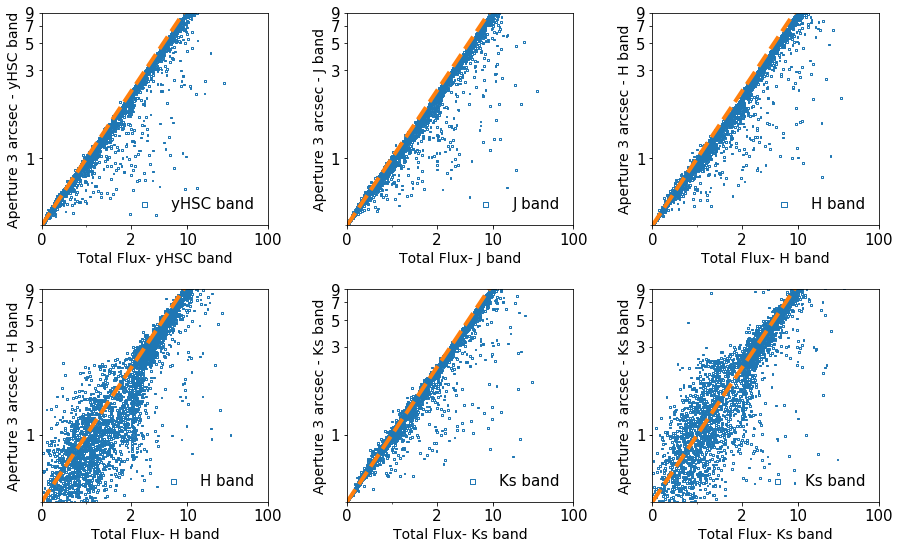

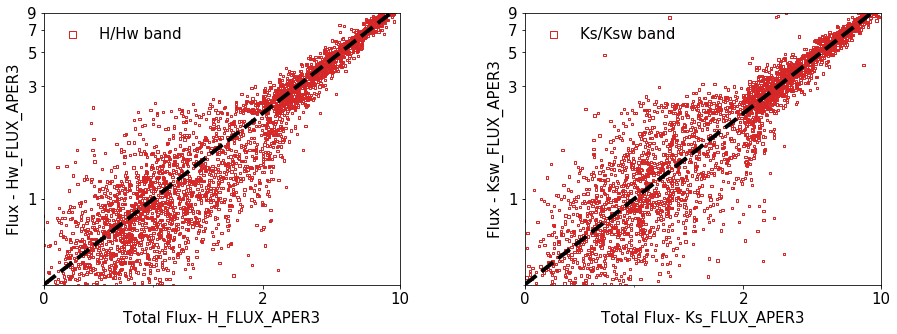

In [23]:
# Checking the Y, J, H, and Ks bands because there different measurements 
# This is needed to use the best one

bands_check_1 = ['yHSC_FLUX_TOT', 'J_FLUX_TOT', 'H_FLUX_TOT', 'H_FLUX_TOT', 'Ks_FLUX_TOT', 'Ks_FLUX_TOT']
bands_check_2 = ['yHSC_FLUX_APER3', 'J_FLUX_APER3', 'H_FLUX_APER3', 'Hw_FLUX_APER3', 'Ks_FLUX_APER3', 'Ksw_FLUX_APER3']
name_check    = ['yHSC band', 'J band', 'H band', 'H band', 'Ks band', 'Ks band']

X = np.linspace(0, 10, 100)

fig, axs = plt.subplots(figsize = (15, 9), ncols = 3, nrows = 2, sharey = False, facecolor = 'w', edgecolor = 'k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.35)

axs = axs.ravel()

for i in range(len(bands_check_1)):
    
    axs[i].scatter(sample[bands_check_1[i]], help_MIPS_laigle_3dhst_HELPBANDS[bands_check_2[i]],\
            s = 3, marker = 's', facecolors='none', edgecolors='C0', label = name_check[i])
    axs[i].plot(X, X, ls = '--', lw = 4, c = 'C1')
    axs[i].set_xlim(0, 9)
    axs[i].set_ylim(0, 9)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xticks([0, 2, 10, 100])
    axs[i].set_yticks([1, 3, 5, 7, 9])
    axs[i].set_xticklabels([0, 2, 10, 100])
    axs[i].set_yticklabels([1, 3, 5, 7, 9])
    axs[i].set_xlabel(r'Total Flux- %s'%name_check[i], fontsize = 14)
    axs[i].set_ylabel(r'Aperture 3 arcsec - %s'%name_check[i], fontsize = 14)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 15)
    axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'lower right')
    
#===================================================================================================================
bands_check_1 = ['H_FLUX_APER3', 'Ks_FLUX_APER3']
bands_check_2 = ['Hw_FLUX_APER3', 'Ksw_FLUX_APER3']
name_check    = ['H/Hw band', 'Ks/Ksw band']

fig, axs = plt.subplots(figsize = (15, 5), ncols = 2, nrows = 1, sharey = False, facecolor = 'w', edgecolor = 'k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.35)

axs = axs.ravel()

for i in range(2):
    
    axs[i].scatter(sample[bands_check_1[i]], help_MIPS_laigle_3dhst_HELPBANDS[bands_check_2[i]],\
            s = 5, marker = 's', facecolors='none', edgecolors='C3', label = name_check[i])
    axs[i].plot(X, X, ls = '--', lw = 4, c = 'k')
    axs[i].set_xlim(0, 9)
    axs[i].set_ylim(0, 9)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xticks([0, 2, 10])
    axs[i].set_yticks([1, 3, 5, 7, 9])
    axs[i].set_xticklabels([0, 2, 10])
    axs[i].set_yticklabels([1, 3, 5, 7, 9])
    axs[i].set_xlabel(r'Total Flux- %s'%bands_check_1[i], fontsize = 15)
    axs[i].set_ylabel(r'Flux - %s'%bands_check_2[i], fontsize = 15)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 15)
    axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left')    

# Checking band total fluxes from HELP and Laigle et al., 2016 corrected

This was performed in order to check the total magnitudes and fluxes computed using the method provided in Laigle et al., 2016 and the one performed in the HELP-project. Once again, the only difference is for those objects which are really faint but for the fluxes there's no problem at all. 

In [129]:
# Filling inf values to 'nan' and then to -9999.99 for the histograms
# Also to be consistent 

final_sample = final_sample.to_pandas()
final_sample = final_sample.replace([np.inf, -np.inf], np.nan)
final_sample = final_sample.fillna(-9999.99)
final_sample = Table.from_pandas(final_sample)

u_bands = ['help_f_omegacam_u','u_FLUX_TOT']
b_bands = ['help_f_suprime_b', 'B_FLUX_TOT']
v_bands = ['help_f_suprime_v', 'V_FLUX_TOT']
r_bands = ['help_f_suprime_r', 'r_FLUX_TOT']
i_bands = ['help_f_suprime_ip', 'ip_FLUX_TOT']
z_bands = ['help_f_suprime_zpp', 'zpp_FLUX_TOT']
y_bands = ['help_f_suprime_y', 'yHSC_FLUX_TOT']
j_bands = ['help_f_vista_j', 'J_FLUX_TOT']
h_bands = ['help_f_vista_h', 'H_FLUX_TOT']
k_bands = ['help_f_vista_ks', 'Ks_FLUX_TOT']

name_bands = ["OMEGACam u", "SUPRIME B", "SUPRIME V",\
              "SUPRIME r", "SUPRIME i", "SUPRIME z",\
              "SUPRIME y", "VISTA J",  "VISTA H", "VISTA Ks"]

all_bands = [u_bands, b_bands, v_bands, r_bands, i_bands, z_bands, y_bands, j_bands, h_bands, k_bands]

def flux_to_mag(fluxes):
    return( 2.5*( 23.0 - np.log10( fluxes/1e6 ) ) - 48.6 )

def nb_histograms_mag(table, column_names, name_bands, labels=None):
    """Plot histograms of table columns

    This function plots histograms of columns in an astropy table on the same
    figure.

    This function does not return anything and is intended to be used within
    a notebook to display a plot.

    Parameters
    ----------
    table: astropy.table.Table
        The astropy table.
    column_names: list of strings
        The name of the columns for which an histogram will be plotted.
    labels: list of strings
        If provided, the label to use for each histogram.

    """

    if labels is None:
        labels = column_names

    fig, ax = plt.subplots(figsize = (7, 5))

    for name, label in zip(column_names, labels):
#         mask = np.isfinite(table[name])
        mask = table[name] > 0
        if not np.isnan(table[name]).all():
            vz.hist(flux_to_mag(table[name][mask]), bins = 'scott', histtype = 'step', lw =2 , label=label)
            plt.title('%s'%name_bands)
            plt.xlabel('Mag_Tot Corrected [mag]', fontsize = 15)
            plt.ylabel('Number', fontsize = 15)
            plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
            plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left') 
        else:
            print("HELP warning: the column {} ({}) is empty.".format(
                name, label))

    ax.legend()
    display(fig)
    plt.close()
    
def nb_histograms_flux(table, column_names, name_bands, labels=None):
    """Plot histograms of table columns

    This function plots histograms of columns in an astropy table on the same
    figure.

    This function does not return anything and is intended to be used within
    a notebook to display a plot.

    Parameters
    ----------
    table: astropy.table.Table
        The astropy table.
    column_names: list of strings
        The name of the columns for which an histogram will be plotted.
    labels: list of strings
        If provided, the label to use for each histogram.

    """

    if labels is None:
        labels = column_names

    fig, ax = plt.subplots(figsize = (7, 5))

    for name, label in zip(column_names, labels):
#         mask = np.isfinite(table[name])
        mask = table[name] > 0
        if not np.isnan(table[name]).all():
            vz.hist(table[name][mask], bins = 'scott', histtype = 'step', lw = 2, label=label)
            plt.title('%s'%name_bands)
            plt.xlabel(r'Flux_Tot Corrected [$\mu Jy$]', fontsize = 15)
            plt.ylabel('Number', fontsize = 15)
#             plt.xscale('log')
            plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
#             plt.xlim(-0.2 , np.nanpercentile(table[name][mask], 99))
            plt.xlim(0.0 , 0.6)
            plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left') 
        else:
            print("HELP warning: the column {} ({}) is empty.".format(
                name, label))

    ax.legend()
    display(fig)
    plt.close()    

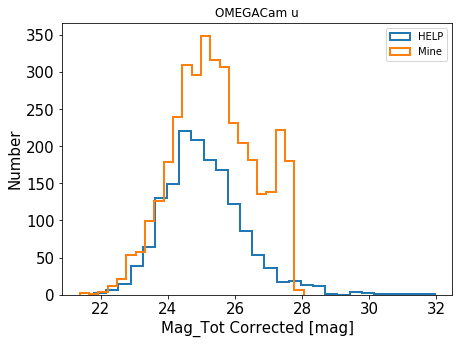

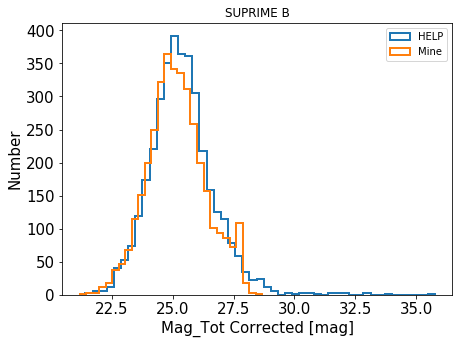

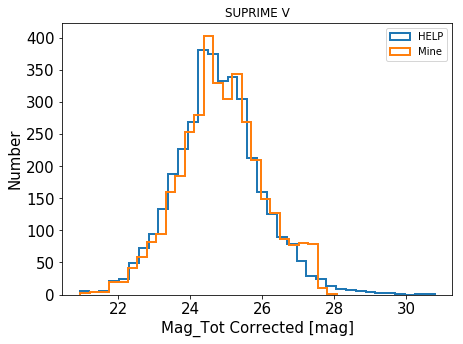

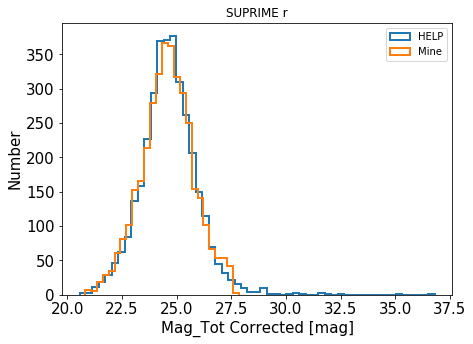

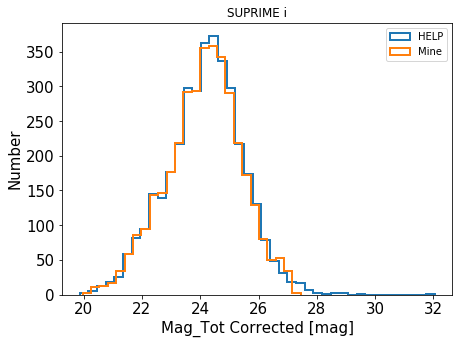

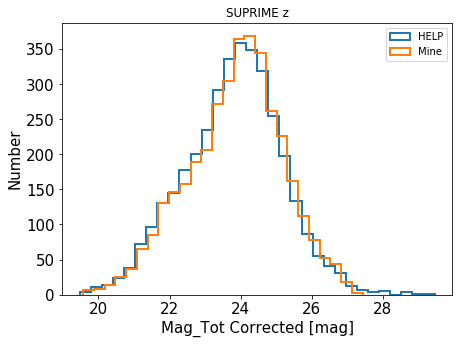

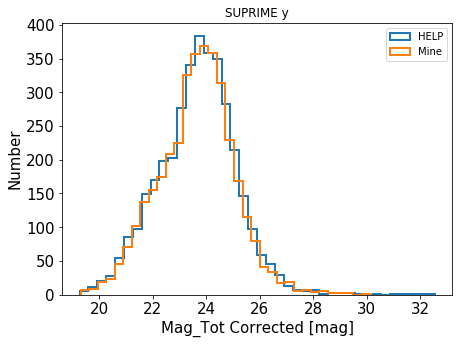

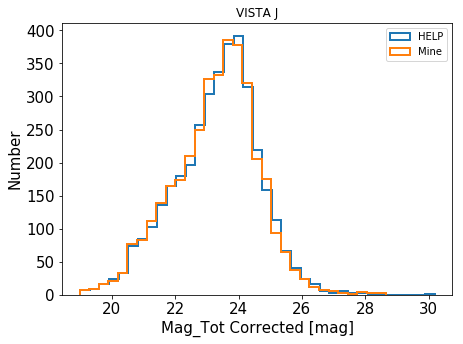

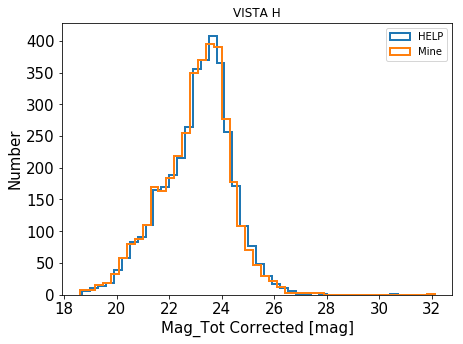

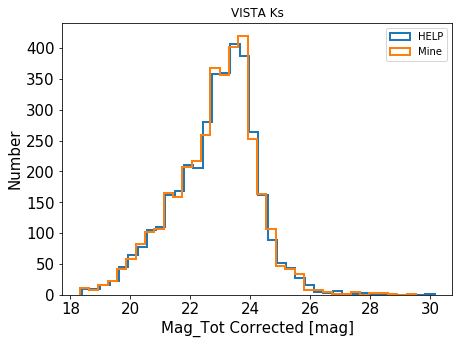

In [626]:
for i in range(10):
    nb_histograms_mag(final_sample, [all_bands[i][0], all_bands[i][1]], name_bands[i], ['HELP', 'Mine'])

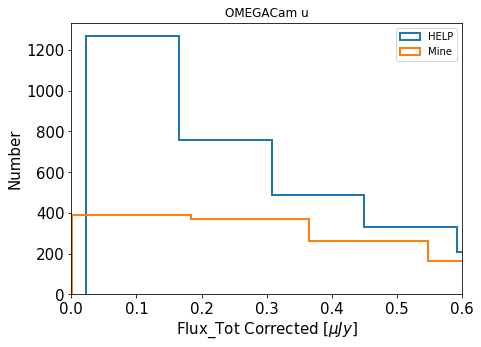

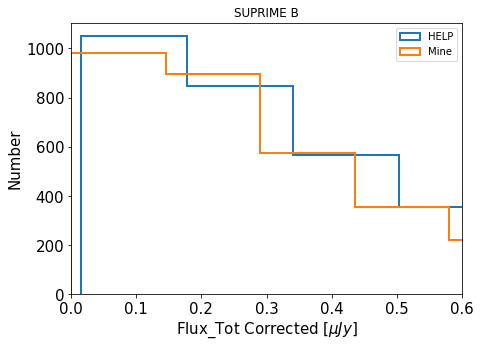

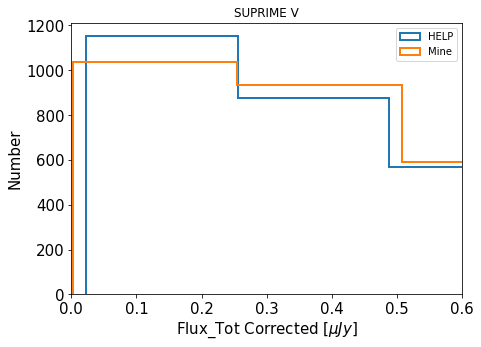

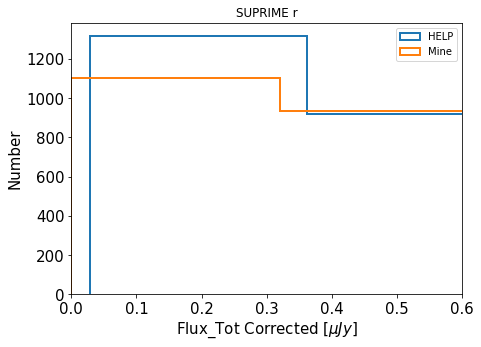

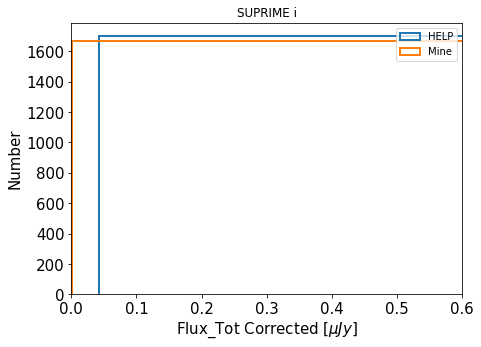

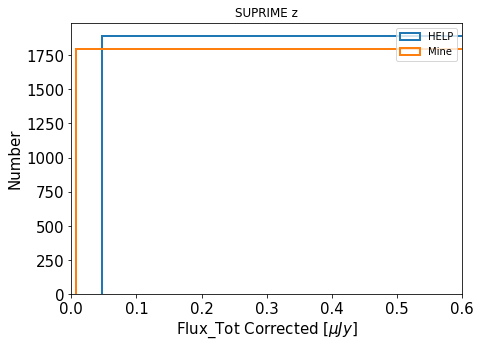

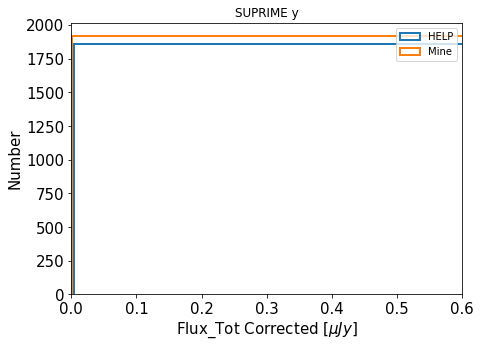

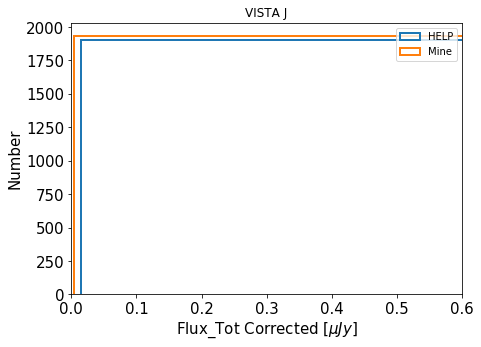

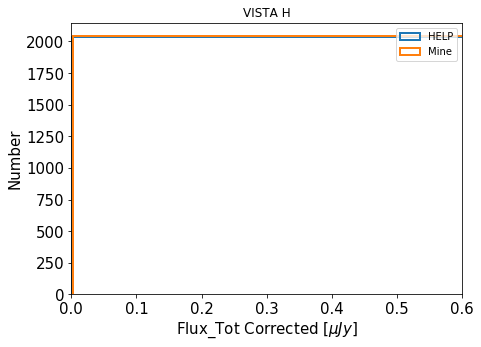

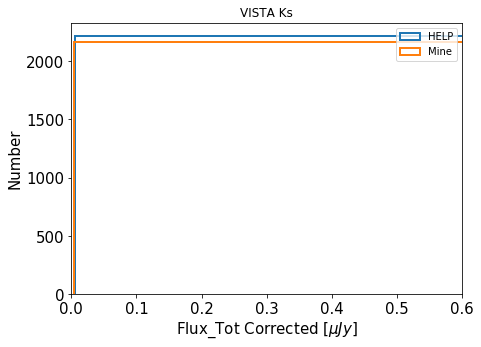

In [645]:
for i in range(10):
    nb_histograms_flux(final_sample, [all_bands[i][1], all_bands[i][0]], name_bands[i], ['HELP', 'Mine'])

# Creating the final sample for CIGALE

The final file which must be provided to CIGALE is created here. 

The FLUX units must be mJy, the FLUX-Density units Joules/s/m^2
The redshifts cannot too small. Some problems can arise if the value corresponds to -9999.99

Final samples are crossmatched to Buat et al., 2018 data in order to compare if the redshift, flux, flux-density range are in the same range as expected. this is really important before writing out the final file to be used in the CIGALE runs. 

In [24]:
#===================================================================================================================
# Changing units for CIGALE and correcting data
#===================================================================================================================
uJy_to_mJy = 1e-3    # microJy to milliJY
to_Watts   = 0.001   #from ergs/s/cm**2 to Joules/s/m**2
hst_units  = 1e-17   #ergs/s/cm**2

flux_tot       = ['FLUX_GALEX_NUV',\
                  'u_FLUX_TOT', 'B_FLUX_TOT', 'V_FLUX_TOT', 'r_FLUX_TOT',\
                  'ip_FLUX_TOT', 'zpp_FLUX_TOT', 'yHSC_FLUX_TOT', 'J_FLUX_TOT',\
                  'H_FLUX_TOT', 'Ks_FLUX_TOT',\
                  'SPLASH_1_FLUX', 'SPLASH_2_FLUX', 'SPLASH_3_FLUX', 'SPLASH_4_FLUX',\
                  'F_MIPS_24', 'help_f_mips_24',\
                  'help_f_pacs_green', 'help_f_pacs_red',\
                  'help_f_spire_250', 'help_f_spire_350',\
                  'help_f_spire_500']

fluxerr_tot    = ['FLUXERR_GALEX_NUV',\
                  'u_FLUX_TOT_err', 'B_FLUX_TOT_err', 'V_FLUX_TOT_err', 'r_FLUX_TOT_err',\
                  'ip_FLUX_TOT_err', 'zpp_FLUX_TOT_err', 'yHSC_FLUX_TOT_err', 'J_FLUX_TOT_err',\
                  'H_FLUX_TOT_err', 'Ks_FLUX_TOT_err',\
                  'SPLASH_1_FLUX_ERR', 'SPLASH_2_FLUX_ERR', 'SPLASH_3_FLUX_ERR', 'SPLASH_4_FLUX_ERR',\
                  'FErr_MIPS_24_u', 'help_ferr_mips_24',\
                  'help_ferr_pacs_green', 'help_ferr_pacs_red',\
                  'help_ferr_spire_250', 'help_ferr_spire_350',\
                  'help_ferr_spire_500']

spec_lines     = ['Ha_FLUX', 'Ha_FLUX_ERR', 'Hb_FLUX', 'Hb_FLUX_ERR',\
                 'OII_FLUX', 'OII_FLUX_ERR', 'OIII_FLUX', 'OIII_FLUX_ERR']

for i in range (len(flux_tot)):
    
    sample[flux_tot[i]]    = sample[flux_tot[i]]*uJy_to_mJy
    sample[fluxerr_tot[i]] = sample[fluxerr_tot[i]]*uJy_to_mJy
    
for i in range(len(spec_lines)):
    
    sample[spec_lines[i]] = sample[spec_lines[i]]*hst_units*to_Watts
#===================================================================================================================

# Saving the final sample without corrected  PACS data

In [29]:
# Changing possible 'NAN' values and -99.0 to -9999.999
# Cutting in redshift to be consistent with the H-alpha line in the 3D-HST grism range
# Two files are saved: With and without PACS and SPIRE data

for i in range(len(flux_total)):
    
    sample[flux_total[i]][np.isinf(sample[flux_total[i]])]         = -9999.99
    sample[flux_total_err[i]][np.isinf(sample[flux_total_err[i]])] = -9999.99

sample = sample.to_pandas()
sample = sample.fillna(-9999.99)
sample = Table.from_pandas(sample)

sample = sample.to_pandas()
sample = sample.replace(-9999.99*uJy_to_mJy, -9999.99)
sample = sample.replace(-9999.99*hst_units*to_Watts, -9999.99)
sample = Table.from_pandas(sample)

# This must be changed if I want to increase the sample and not limit it to a certain redshift range
# sample = sample[(sample['z_best'] > 0.6) & (sample['z_best'] < 1.6)]

COSMOS_CIGALE = Table([sample['help_id_1'], sample['z_best'], sample['FLUX_GALEX_NUV'],\
                        sample['FLUXERR_GALEX_NUV'], sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                        sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'], sample['V_FLUX_TOT'],\
                        sample['V_FLUX_TOT_err'], sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                        sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'], sample['zpp_FLUX_TOT'],\
                        sample['zpp_FLUX_TOT_err'], sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                        sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'], sample['H_FLUX_TOT'],\
                        sample['H_FLUX_TOT_err'], sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                        sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'], sample['SPLASH_2_FLUX'],\
                        sample['SPLASH_2_FLUX_ERR'], sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                        sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR'],\
                        sample['help_f_mips_24'], sample['help_ferr_mips_24'], sample['Ha_FLUX'],\
                        sample['Ha_FLUX_ERR'], sample['Hb_FLUX'], sample['Hb_FLUX_ERR'],\
                        sample['OII_FLUX'], sample['OII_FLUX_ERR'],\
                        sample['OIII_FLUX'], sample['OIII_FLUX_ERR']],\
               names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/sample_cigale_1.fits')
COSMOS_CIGALE.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                    'CIGALE_file/sample_cigale_1.fits', format='fits')


#===================================================================================================================
# Saving the same data but including PACS and SPIRE
#===================================================================================================================

COSMOS_CIGALE_1 = Table([sample['help_id_1'], sample['z_best'], sample['FLUX_GALEX_NUV'],\
                        sample['FLUXERR_GALEX_NUV'], sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                        sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'], sample['V_FLUX_TOT'],\
                        sample['V_FLUX_TOT_err'], sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                        sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'], sample['zpp_FLUX_TOT'],\
                        sample['zpp_FLUX_TOT_err'], sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                        sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'], sample['H_FLUX_TOT'],\
                        sample['H_FLUX_TOT_err'], sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                        sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'], sample['SPLASH_2_FLUX'],\
                        sample['SPLASH_2_FLUX_ERR'], sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                        sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR'],\
                        sample['help_f_mips_24'], sample['help_ferr_mips_24'],\
                        sample['help_f_pacs_green'], sample['help_ferr_pacs_green'],\
                        sample['help_f_pacs_red'], sample['help_ferr_pacs_red'],\
                        sample['help_f_spire_250'], sample['help_ferr_spire_250'],\
                        sample['help_f_spire_350'], sample['help_ferr_spire_350'],\
                        sample['help_f_spire_500'], sample['help_ferr_spire_500'], sample['Ha_FLUX'],\
                        sample['Ha_FLUX_ERR'], sample['Hb_FLUX'], sample['Hb_FLUX_ERR'],\
                        sample['OII_FLUX'], sample['OII_FLUX_ERR'],\
                        sample['OIII_FLUX'], sample['OIII_FLUX_ERR']],\
               names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/sample_cigale_2.fits')
COSMOS_CIGALE_1.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                      'CIGALE_file/sample_cigale_2.fits', format='fits')

#===================================================================================================================
# Saving the same data but including PACS and SPIRE and also RA and DEC to crossmatch with the corrected
# PACS red data and create a final real sample. Also to crossmatch to Jin data and perfomr SED fitting analysis.
#===================================================================================================================


# This one corresponds to my most general file
# If I need more data just change the redshift condition


COSMOS_CIGALE_1_1 = Table([sample['help_id_1'], sample['help_ra'], sample['help_dec'], sample['z_best'], sample['FLUX_GALEX_NUV'],\
                        sample['FLUXERR_GALEX_NUV'], sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                        sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'], sample['V_FLUX_TOT'],\
                        sample['V_FLUX_TOT_err'], sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                        sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'], sample['zpp_FLUX_TOT'],\
                        sample['zpp_FLUX_TOT_err'], sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                        sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'], sample['H_FLUX_TOT'],\
                        sample['H_FLUX_TOT_err'], sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                        sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'], sample['SPLASH_2_FLUX'],\
                        sample['SPLASH_2_FLUX_ERR'], sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                        sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR'],\
                        sample['help_f_mips_24'], sample['help_ferr_mips_24'],\
                        sample['help_f_pacs_green'], sample['help_ferr_pacs_green'],\
                        sample['help_f_pacs_red'], sample['help_ferr_pacs_red'],\
                        sample['help_f_spire_250'], sample['help_ferr_spire_250'],\
                        sample['help_f_spire_350'], sample['help_ferr_spire_350'],\
                        sample['help_f_spire_500'], sample['help_ferr_spire_500'], sample['Ha_FLUX'],\
                        sample['Ha_FLUX_ERR'], sample['Hb_FLUX'], sample['Hb_FLUX_ERR'],\
                        sample['OII_FLUX'], sample['OII_FLUX_ERR'],\
                        sample['OIII_FLUX'], sample['OIII_FLUX_ERR']],\
               names = ('id', 'ra', 'dec','redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/'
          'Final_Sample_RaDec.fits')
COSMOS_CIGALE_1_1.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                      'CIGALE_file/Final_Sample_RaDec.fits', format='fits')

# Final Version to be used in CIGALE with corrected PACS red band

In [30]:
# The final version above contains corrected data and uncorrected data so a new file must be created
# containing the final corrected data. the corssmatch was made using TOPCAT!

# Final_Sample_RaDec.fits was crossmatched to HELP_subsample_merged_corrected.fits

Final_CIGALE = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                      'CIGALE_file/Final_Sample_RaDec_PACSredCorrected_Added.fits', format = 'fits')

In [31]:
# Convert from μJy to mJy
for col in ['help_f_pacs_green','help_ferr_pacs_green',\
            'help_f_pacs_red','help_ferr_pacs_red',\
            'help_f_spire_250','help_ferr_spire_250',\
            'help_f_spire_350','help_ferr_spire_350',\
            'help_f_spire_500','help_ferr_spire_500']:
    Final_CIGALE[col] *= 1e-3

In [32]:
# Final sample to be used for scientific analysis

cosmos_final = Table([Final_CIGALE['id'], Final_CIGALE['redshift'],\
                      Final_CIGALE['galex.NUV'], Final_CIGALE['galex.NUV_err'],\
                      Final_CIGALE['cfht.megacam.u'], Final_CIGALE['cfht.megacam.u_err'],\
                      Final_CIGALE['subaru.suprime.B'], Final_CIGALE['subaru.suprime.B_err'],\
                      Final_CIGALE['subaru.suprime.V'], Final_CIGALE['subaru.suprime.V_err'],\
                      Final_CIGALE['subaru.suprime.r'], Final_CIGALE['subaru.suprime.r_err'],\
                      Final_CIGALE['subaru.suprime.i'], Final_CIGALE['subaru.suprime.i_err'],\
                      Final_CIGALE['subaru.suprime.z'], Final_CIGALE['subaru.suprime.z_err'],\
                      Final_CIGALE['subaru.hsc.y'], Final_CIGALE['subaru.hsc.y_err'],\
                      Final_CIGALE['UKIRT_WFCJ'], Final_CIGALE['UKIRT_WFCJ_err'],\
                      Final_CIGALE['cfht.wircam.H'], Final_CIGALE['cfht.wircam.H_err'],\
                      Final_CIGALE['WFCAM_K'], Final_CIGALE['WFCAM_K_err'],\
                      Final_CIGALE['IRAC1'], Final_CIGALE['IRAC1_err'],\
                      Final_CIGALE['IRAC2'], Final_CIGALE['IRAC2_err'],\
                      Final_CIGALE['IRAC3'], Final_CIGALE['IRAC3_err'],\
                      Final_CIGALE['IRAC4'], Final_CIGALE['IRAC4_err'],\
                      Final_CIGALE['spitzer.mips.24'], Final_CIGALE['spitzer.mips.24_err'],\
                      Final_CIGALE['herschel.pacs.100'], Final_CIGALE['herschel.pacs.100_err'],\
                      Final_CIGALE['help_f_pacs_red'], Final_CIGALE['help_ferr_pacs_red'],\
                      Final_CIGALE['herschel.spire.PSW'], Final_CIGALE['herschel.spire.PSW_err'],\
                      Final_CIGALE['herschel.spire.PMW'], Final_CIGALE['herschel.spire.PMW_err'],\
                      Final_CIGALE['herschel.spire.PLW'], Final_CIGALE['herschel.spire.PLW_err'],\
                      Final_CIGALE['line.NII-654.8+line.H-alpha+line.NII-658.4'],\
                      Final_CIGALE['line.NII-654.8+line.H-alpha+line.NII-658.4_err'],\
                      Final_CIGALE['line.H-beta'], Final_CIGALE['line.H-beta_err'],\
                      Final_CIGALE['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12'],\
                      Final_CIGALE['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err'],\
                      Final_CIGALE['line.OIII-500.7'], Final_CIGALE['line.OIII-500.7_err']],\
               names = ('id','redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/COSMOS_final.fits')
cosmos_final.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/COSMOS_final.fits', format='fits')

# Checking and comapring data to be sure

# Comparing my catalog to Buat et al., 2018 catalog

In [3]:
# The files are uploaded with/without PACS and SPIRE data
# Also Buat et al., 2018 catlog

#Without PACS and SPIRE data
Cigale_sample_1 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                             'COSMOS/CIGALE_file/sample_cigale_1.fits', format = 'fits')

#With PACS and SPIRE data
Cigale_sample_2 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                             'COSMOS/CIGALE_file/sample_cigale_2.fits', format = 'fits')

Veronique_sample = Table.read('/home/jvilla/Documents/PhD_2018/Veronique_Test/'
                              'catalogue_RF_EW.fits', format = 'fits')

#Values are in μJy
help_corrected_PACS = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                                 'COSMOS_HELP/HELP_subsample_merged_corrected.fits', format='fits')

In [260]:
#Merging Veronique's sample with my sample

#Tables must be converted to pandas frame
Cigale_sample_1   = Cigale_sample_1.to_pandas()
Veronique_sample  = Veronique_sample.to_pandas()

# Final table must have the same dimension as the first table plus the aditional columns from the second table
test = pd.merge(Veronique_sample, Cigale_sample_1, how ='left', on='id')

test = test.fillna(-9999.99)

# Back to Astropy Table to use regular conditionals in python
test = Table.from_pandas(test)

print('Final file length: %i'%len(test))

Final file length: 35


Band: 			 Data in Vero: 		Non_Zero:	My data:	Non_zero:
         galex.NUV_x		35		24		35		23
    cfht.megacam.u_x		35		35		35		33
  subaru.suprime.B_x		35		35		35		33
  subaru.suprime.V_x		35		35		35		33
  subaru.suprime.r_x		35		35		35		33
  subaru.suprime.i_x		35		35		35		33
  subaru.suprime.z_x		35		35		35		33
      subaru.hsc.y_x		35		35		35		33
        UKIRT_WFCJ_x		35		35		35		33
     cfht.wircam.H_x		35		34		35		33
           WFCAM_K_x		35		35		35		33
             IRAC1_x		35		35		35		33
             IRAC2_x		35		35		35		33
             IRAC3_x		35		35		35		33
             IRAC4_x		35		35		35		33
   spitzer.mips.24_x		35		35		35		33


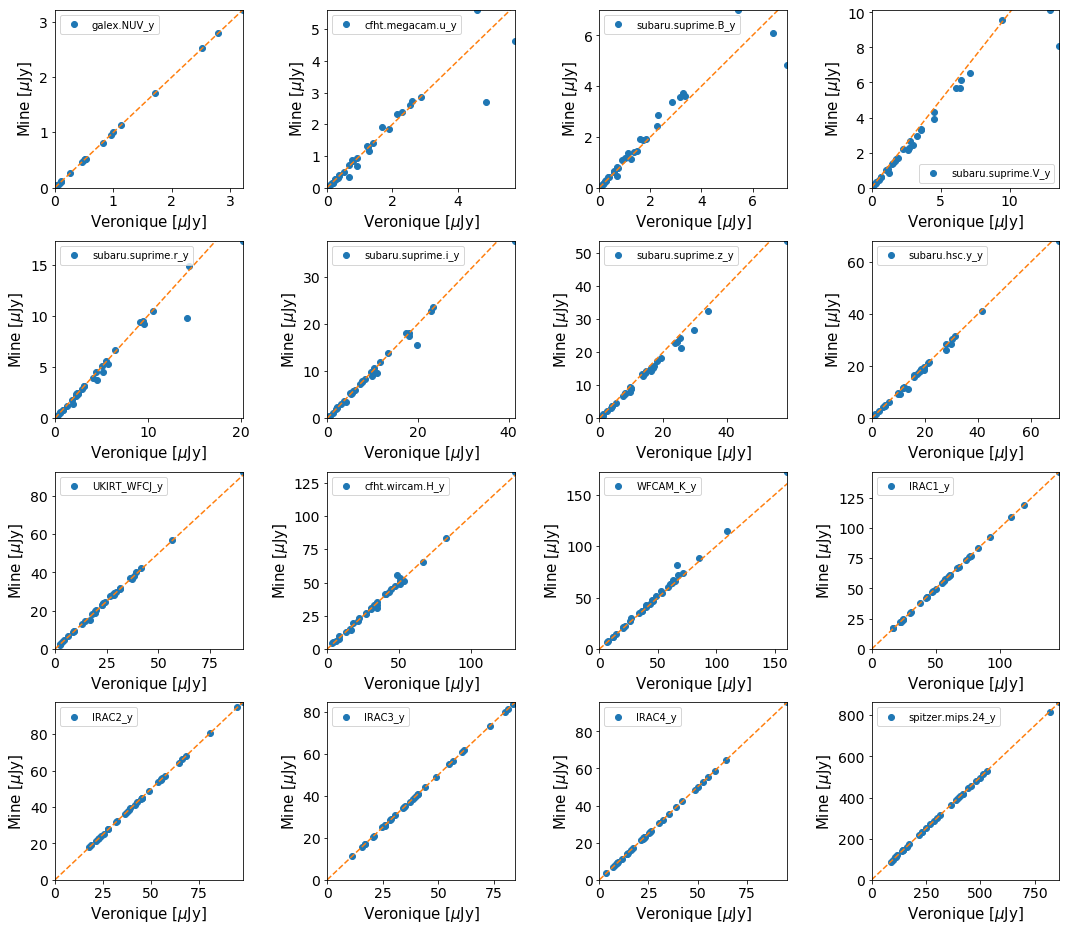

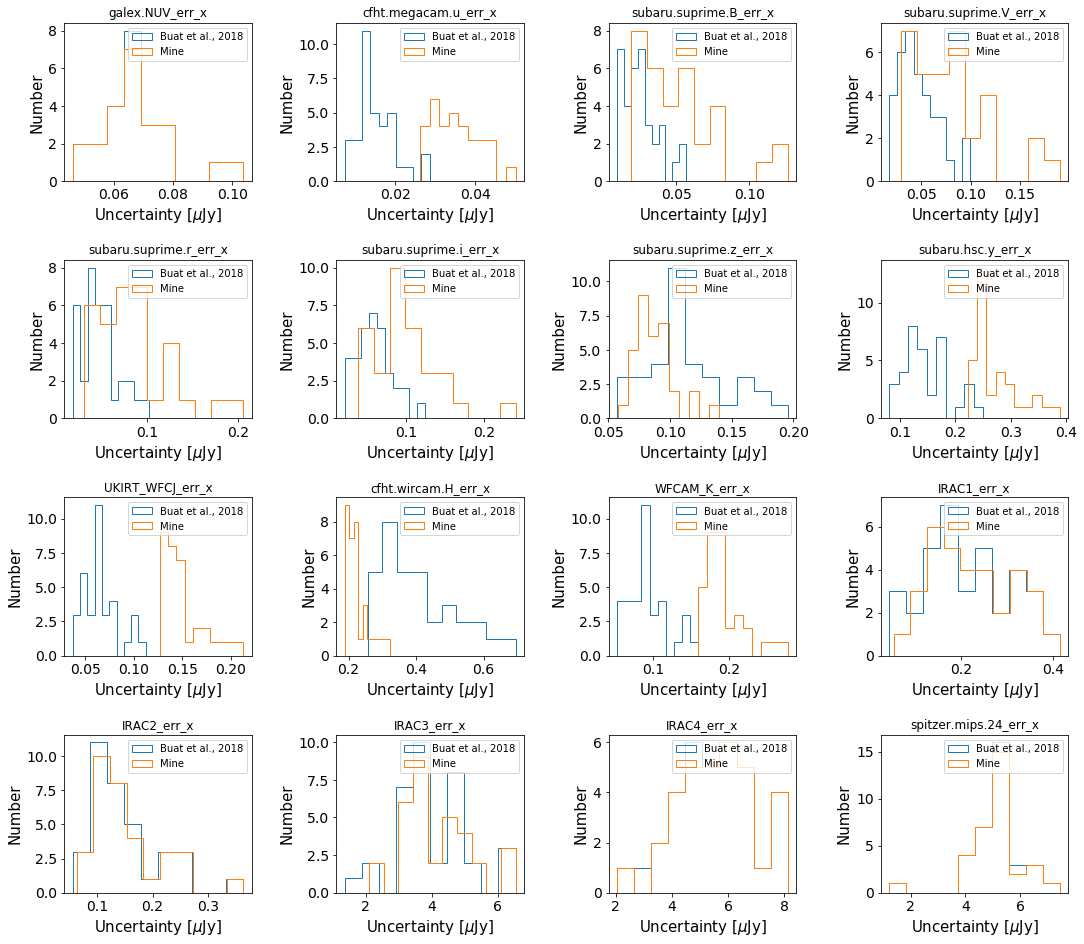

In [140]:
# Checking the bands inside both catalogs
# Checking the number of valid data inside each band
# Checking the mag and mag_err distributions

X = np.linspace(0, 1000, 100)

band_vero    = ['galex.NUV_x', 'cfht.megacam.u_x', 'subaru.suprime.B_x',\
                'subaru.suprime.V_x', 'subaru.suprime.r_x', 'subaru.suprime.i_x',\
                'subaru.suprime.z_x', 'subaru.hsc.y_x', 'UKIRT_WFCJ_x', 'cfht.wircam.H_x',\
                'WFCAM_K_x', 'IRAC1_x', 'IRAC2_x', 'IRAC3_x',\
                'IRAC4_x', 'spitzer.mips.24_x']

band_mine    = ['galex.NUV_y', 'cfht.megacam.u_y', 'subaru.suprime.B_y',\
                'subaru.suprime.V_y', 'subaru.suprime.r_y', 'subaru.suprime.i_y',\
                'subaru.suprime.z_y', 'subaru.hsc.y_y', 'UKIRT_WFCJ_y', 'cfht.wircam.H_y',\
                'WFCAM_K_y', 'IRAC1_y', 'IRAC2_y', 'IRAC3_y',\
                'IRAC4_y', 'spitzer.mips.24_y']

band_err_vero = ['galex.NUV_err_x', 'cfht.megacam.u_err_x', 'subaru.suprime.B_err_x',\
                 'subaru.suprime.V_err_x', 'subaru.suprime.r_err_x', 'subaru.suprime.i_err_x',\
                 'subaru.suprime.z_err_x', 'subaru.hsc.y_err_x', 'UKIRT_WFCJ_err_x', 'cfht.wircam.H_err_x',\
                 'WFCAM_K_err_x', 'IRAC1_err_x', 'IRAC2_err_x', 'IRAC3_err_x',\
                 'IRAC4_err_x', 'spitzer.mips.24_err_x']

band_err_mine = ['galex.NUV_err_y', 'cfht.megacam.u_err_y', 'subaru.suprime.B_err_y',\
                 'subaru.suprime.V_err_y', 'subaru.suprime.r_err_y', 'subaru.suprime.i_err_y',\
                 'subaru.suprime.z_err_y', 'subaru.hsc.y_err_y', 'UKIRT_WFCJ_err_y', 'cfht.wircam.H_err_y',\
                 'WFCAM_K_err_y', 'IRAC1_err_y', 'IRAC2_err_y', 'IRAC3_err_y',\
                 'IRAC4_err_y', 'spitzer.mips.24_err_y']

print('Band: \t\t\t Data in Vero: \t\tNon_Zero:\tMy data:\tNon_zero:')
for i in range(len(band_vero)):
    
    x = test[band_vero[i]][test[band_vero[i]] != -9999.99]
    y = test[band_mine[i]][test[band_mine[i]] != -9999.99]
    
    print('%20s\t\t%i\t\t%i\t\t%i\t\t%i'\
          %(band_vero[i], len(test[band_vero[i]]), len(x), len(test[band_mine[i]]), len(y)))

fig, axs = plt.subplots(4,4, figsize=(18, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(band_vero)):

    axs[i].scatter(test[band_vero[i]]*1e3, test[band_mine[i]]*1e3)
    axs[i].set_xlabel(r'Veronique [$\mu$Jy]', fontsize = 15)
    axs[i].set_ylabel(r'Mine [$\mu$Jy]', fontsize = 15)
    axs[i].plot(X, X, ls ='--', c = 'C1')
    axs[i].set_xlim(0, np.max(test[band_vero[i]]*1e3))
    axs[i].set_ylim(0, np.max(test[band_mine[i]]*1e3))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left')
    axs[i].legend()
    
fig, axs = plt.subplots(4,4, figsize=(18, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace = 0.45)

axs = axs.ravel()

for i in range(len(band_err_vero)):

    x = test[band_err_vero[i]][test[band_err_vero[i]] != -9999.99]
    y = test[band_err_mine[i]][test[band_err_mine[i]] != -9999.99]
    
    axs[i].hist(x*1e3, histtype = 'step', label = 'Buat et al., 2018', bins = 10)
    axs[i].hist(y*1e3, histtype = 'step', label = 'Mine', bins = 10)
#     axs[i].set_xlim(np.nanpercentile(y, 0.1), np.nanpercentile(y, 99.9))
    axs[i].set_xlabel(r'Uncertainty [$\mu$Jy]', fontsize = 15)
    axs[i].set_ylabel('Number', fontsize = 15)
    axs[i].set_title('%s'%band_err_vero[i])
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left')
    axs[i].legend()

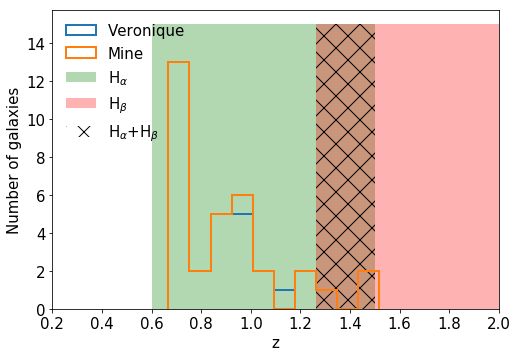

In [141]:
# Redshift distribution
# Emission lines ranges are colored

# Redshift == -9999.99 means the object was not found in the
# crossmatching process so it must not be taken into account
# HELP_J100022.17+021312.51
# HELP_J100043.42+022143.83
test = test[test['redshift_y'] != -9999.99]

plt.figure(figsize = (8,5.5))
plt.hist(test['redshift_x'], histtype = 'step', lw = 2, label = 'Veronique')
plt.hist(test['redshift_y'][test['redshift_y'] > 0], histtype = 'step', lw = 2, label = 'Mine')
plt.fill_between([0.6, 1.5], 0.0, 15, facecolor='green', alpha=0.3, label = r'H$_\alpha$')
plt.fill_between([1.263, 2.394], 0.0, 15, facecolor='red', alpha=0.3, label = r'H$_\beta$')
plt.fill_between([1.263, 1.5], 0.0, 15, facecolor='k', alpha=0.0, hatch="X", label = r'H$_\alpha$+H$_\beta$')
plt.xlim(0.2, 2.0)
plt.xlabel('z', fontsize = 15)
plt.ylabel('Number of galaxies', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left');

# Checking PACS and SPIRE data

This is needed because the pacs_160 or pacs_red band in the HELP database has wonky errors. It turns out that after inspecting the main notebook (https://github.com/H-E-L-P/dmu_products/blob/master/dmu32/dmu32_COSMOS/COSMOS_catalogue_merging.ipynb) when the error is computed for this band, one of the columns 'FErr_PACS_160_l*1000.0' needs to be multiplied by 1000.0 before computed the errors and also before performing any units conversion. 

In [43]:
help_XID_MIPS        = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
COSMOS/COSMOS_HELP/dmu26_XID+MIPS_COSMOS_20170213.fits', format = 'fits')

help_XID_PACS        = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
COSMOS/COSMOS_HELP/dmu26_XID+PACS_COSMOS_20170303.fits', format = 'fits')

help_XID_SPIRE       = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/\
COSMOS/COSMOS_HELP/dmu26_XID+SPIRE_COSMOS_20161129.fits', format = 'fits')

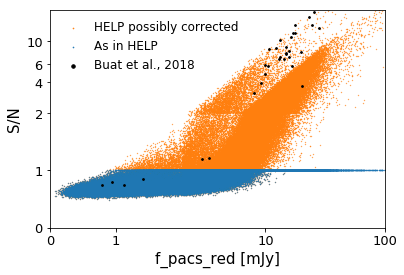

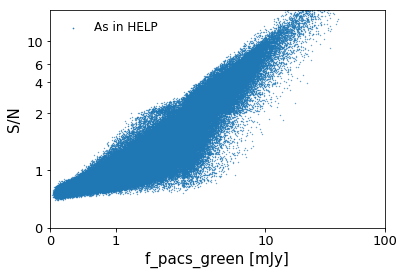

In [154]:
# Computing the error in the pacs_160 band as indicated in the HELP-project

xid_pacs = help_XID_PACS

ferr_pacs_green = np.max([xid_pacs['FErr_PACS_100_u'] - xid_pacs['F_PACS_100'],
                 xid_pacs['F_PACS_100'] - xid_pacs['FErr_PACS_100_l']], axis=0)

ferr_pacs_red_1 = np.max([xid_pacs['FErr_PACS_160_u'] - xid_pacs['F_PACS_160'],
                 xid_pacs['F_PACS_160'] - xid_pacs['FErr_PACS_160_l*1000.0']], axis=0)
ferr_pacs_red_2 = np.max([xid_pacs['FErr_PACS_160_u'] - xid_pacs['F_PACS_160'],
                 xid_pacs['F_PACS_160'] - xid_pacs['FErr_PACS_160_l*1000.0']*1e3], axis=0)

plt.figure()
plt.scatter(xid_pacs['F_PACS_160'], (xid_pacs['F_PACS_160']/ferr_pacs_red_2), label = 'HELP possibly corrected', s = 0.1, c ='C1')
plt.scatter(xid_pacs['F_PACS_160'], (xid_pacs['F_PACS_160']/ferr_pacs_red_1), label = 'As in HELP', s = 0.1, c = 'C0')
plt.scatter(Veronique_sample['herschel.pacs.160'],\
            (Veronique_sample['herschel.pacs.160']/Veronique_sample['herschel.pacs.160_err']),\
           c = 'k', label = 'Buat et al., 2018', s = 3)
plt.xlim(0,100)
plt.ylim(0,20)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xticks([0, 1, 10, 100], [0, 1, 10, 100])
plt.yticks([0, 1, 2, 4, 6, 10], [0, 1, 2, 4, 6, 10])
plt.xlabel(r'f_pacs_red [mJy]', fontsize = 15)
plt.ylabel(r'S/N', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 2 , loc = 'upper left');

plt.figure()
plt.scatter(xid_pacs['F_PACS_100'], xid_pacs['F_PACS_100']/ferr_pacs_green, label = 'As in HELP', s = 0.1)
plt.xlim(0,100)
plt.ylim(0,20)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xticks([0, 1, 10, 100], [0, 1, 10, 100])
plt.yticks([0, 1, 2, 4, 6, 10], [0, 1, 2, 4, 6, 10])
plt.xlabel(r'f_pacs_green [mJy]', fontsize = 15)
plt.ylabel(r'S/N', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 2 , loc = 'upper left');

In [318]:
# Adding the corrected values to the table
xid_pacs.add_column(Column(data = ferr_pacs_red_2, name = "ferr_pacs_red_corrected"))

# Saving HELP ids to compare PACS and SPIRE data to the whole sample

PACS_data = Table([xid_pacs['HELP_ID'], xid_pacs['RA'], xid_pacs['Dec'],\
                  xid_pacs['F_PACS_100'], xid_pacs['ferr_pacs_red_corrected']],\
                  names = ('id_pacs', 'ra_pacs', 'dec_pacs', 'f_pacs_red_corrected', 'ferr_pacs_red_corrected'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/COSMOS_HELP/PACS_100_corrected.fits')
PACS_data.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                 'COSMOS_HELP/PACS_100_corrected.fits', format='fits')

In [73]:
pacs_100 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                      'COSMOS_HELP/PACS_100_corrected.fits', format = 'fits')

In [322]:
# Merging Veronique's sample with my sample

# Tables must be converted to pandas frame
Cigale_sample_2   = Cigale_sample_2.to_pandas()
Veronique_sample  = Veronique_sample.to_pandas()

# Final table must have the same dimension as the first table plus the aditional columns from the second table
test_2 = pd.merge(Veronique_sample, Cigale_sample_2, how ='left', on='id')

test_2 = test_2.fillna(-9999.99)

# Back to Astropy Table to use regular conditionals in python
test_2 = Table.from_pandas(test_2)

print('Final file length: %i'%len(test_2))

Final file length: 35


In [323]:
# This way I include corrected PACS data for the final sample

pacs_100['id_pacs'].name = "id"

# Merging Veronique's sample with my sample

# Tables must be converted to pandas frame
pacs_100  = pacs_100.to_pandas()
test_2    = test_2.to_pandas()

# Final table must have the same dimension as the first table plus the aditional columns from the second table
final_with_pacs = pd.merge(test_2, pacs_100, how ='left', on='id')

final_with_pacs = final_with_pacs.fillna(-9999.99)

# Back to Astropy Table to use regular conditionals in python
final_with_pacs = Table.from_pandas(final_with_pacs)

print('Final file length: %i'%len(final_with_pacs))

PACS_SPIRE = final_with_pacs

Final file length: 35


---------------------------------------------------------------------------
Band 			 Data in Buat et al., 2018 	 Data in my sample
---------------------------------------------------------------------------
herschel.pacs.100_x 			 35 			 35
herschel.pacs.160_x 			 35 			 35
herschel.spire.PSW_x 			 35 			 35
herschel.spire.PMW_x 			 35 			 35
herschel.spire.PLW_x 			 35 			 35
---------------------------------------------------------------------------

Objects with FLUX > 0 and FLUX != -9999.99
---------------------------------------------------------------------------
Band 			 Data in Buat et al., 2018 	 Data in my sample
---------------------------------------------------------------------------
herschel.pacs.100_x 			 35 			 33
herschel.pacs.160_x 			 35 			 33
herschel.spire.PSW_x 			 33 			 33
herschel.spire.PMW_x 			 33 			 33
herschel.spire.PLW_x 			 33 			 33
---------------------------------------------------------------------------


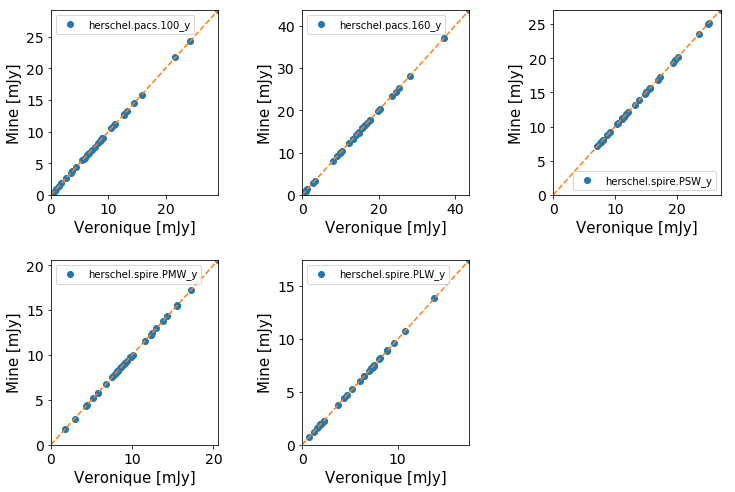

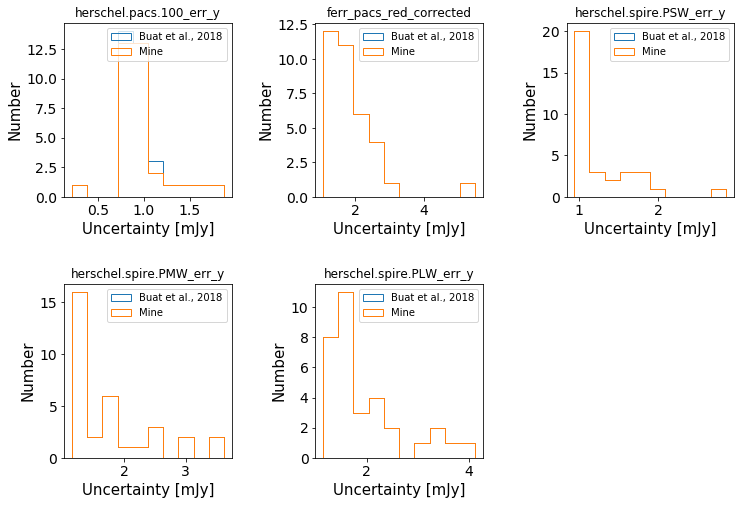

In [311]:
# Comparing the final sample for PACS and SPIRE data
# 'f_pacs_red_corrected' are different from 'herschel.pacs.160_y'. Better use 
# 'herschel.pacs.160_y' because they come from the original file and I just correct the error. 

PACS_SPIRE_bands_mine = ['herschel.pacs.100_y', 'herschel.pacs.160_y',\
                         'herschel.spire.PSW_y','herschel.spire.PMW_y',\
                         'herschel.spire.PLW_y']

PACS_SPIRE_bands_Buat = ['herschel.pacs.100_x','herschel.pacs.160_x',\
                         'herschel.spire.PSW_x','herschel.spire.PMW_x',\
                         'herschel.spire.PLW_x']

PACS_SPIRE_bands_mine_err = ['herschel.pacs.100_err_y', 'ferr_pacs_red_corrected',\
#                              'herschel.pacs.160_err_y',\
                             'herschel.spire.PSW_err_y','herschel.spire.PMW_err_y',\
                             'herschel.spire.PLW_err_y']

PACS_SPIRE_bands_Buat_err = ['herschel.pacs.100_err_x','herschel.pacs.160_err_x',\
                             'herschel.spire.PSW_err_x','herschel.spire.PMW_err_x',\
                             'herschel.spire.PLW_err_x']

print('---------------------------------------------------------------------------')
print('Band \t\t\t Data in Buat et al., 2018 \t Data in my sample')
print('---------------------------------------------------------------------------')
for i in range(len(PACS_SPIRE_bands_mine)):
    print('%s \t\t\t %i \t\t\t %i'%(PACS_SPIRE_bands_Buat[i],\
                                    len(PACS_SPIRE[PACS_SPIRE_bands_Buat[i]]),\
                                    len(PACS_SPIRE[PACS_SPIRE_bands_mine[i]])))
print('---------------------------------------------------------------------------\n')  

print('Objects with FLUX > 0 and FLUX != -9999.99')

print('---------------------------------------------------------------------------')
print('Band \t\t\t Data in Buat et al., 2018 \t Data in my sample')
print('---------------------------------------------------------------------------')
for i in range(len(PACS_SPIRE_bands_mine)):
    
    Buat = PACS_SPIRE[(PACS_SPIRE[PACS_SPIRE_bands_Buat[i]] >0) & (PACS_SPIRE[PACS_SPIRE_bands_Buat[i]] != -9999.99)]
    mine = PACS_SPIRE[(PACS_SPIRE[PACS_SPIRE_bands_mine[i]] >0) & (PACS_SPIRE[PACS_SPIRE_bands_mine[i]] != -9999.99)]
    
    print('%s \t\t\t %i \t\t\t %i'%(PACS_SPIRE_bands_Buat[i],\
                                    len(Buat), len(mine)))
print('---------------------------------------------------------------------------')  


X = np.linspace(0, 45, 1000)

fig, axs = plt.subplots(2,3, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.35, wspace = 0.5)
axs[-1, -1].axis('off')

axs = axs.ravel()

for i in range(len(PACS_SPIRE_bands_mine)):

    axs[i].scatter(PACS_SPIRE[PACS_SPIRE_bands_Buat[i]], PACS_SPIRE[PACS_SPIRE_bands_mine[i]])
    axs[i].set_xlabel('Veronique [mJy]', fontsize = 15)
    axs[i].set_ylabel('Mine [mJy]', fontsize = 15)
    axs[i].plot(X, X, ls ='--', c = 'C1')
    axs[i].set_xlim(0, np.max(PACS_SPIRE[PACS_SPIRE_bands_Buat[i]]))
    axs[i].set_ylim(0, np.max(PACS_SPIRE[PACS_SPIRE_bands_mine[i]]))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left')
    
fig, axs = plt.subplots(2,3, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
axs[-1, -1].axis('off')

axs = axs.ravel()

for i in range(len(PACS_SPIRE_bands_mine_err)):

    x = PACS_SPIRE[PACS_SPIRE_bands_Buat_err[i]][PACS_SPIRE[PACS_SPIRE_bands_Buat_err[i]] != -9999.99]
    y = PACS_SPIRE[PACS_SPIRE_bands_mine_err[i]][PACS_SPIRE[PACS_SPIRE_bands_mine_err[i]] != -9999.99]
    
    axs[i].hist(x, histtype = 'step', label = 'Buat et al., 2018', bins = 10)
    axs[i].hist(y, histtype = 'step', label = 'Mine', bins = 10)
#     axs[i].set_xlim(np.nanpercentile(y, 0.1), np.nanpercentile(y, 99.9))
    axs[i].set_xlabel('Uncertainty [mJy]', fontsize = 15)
    axs[i].set_ylabel('Number', fontsize = 15)
    axs[i].set_title('%s'%PACS_SPIRE_bands_mine_err[i])
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left')


In [131]:
herschel_buat_help = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                                'COSMOS/HELP_Veronique_data/cosmos_sample_herschel-snr5.fits', format = 'fits') 

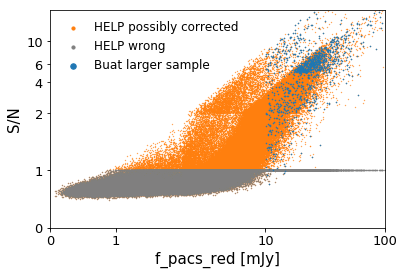

In [151]:
plt.scatter(xid_pacs['F_PACS_160'], xid_pacs['F_PACS_160']/ferr_pacs_red_2, s = 0.1, c ='C1', label = 'HELP possibly corrected')
plt.scatter(xid_pacs['F_PACS_160'], xid_pacs['F_PACS_160']/ferr_pacs_red_1, s = 0.1, c = 'gray',\
           label = 'HELP wrong')
plt.scatter(herschel_buat_help['herschel.pacs.160'],\
            herschel_buat_help['herschel.pacs.160']/herschel_buat_help['herschel.pacs.160_err'], s = 0.3,\
           label ='Buat larger sample')
plt.xlim(0,100)
plt.ylim(0,20)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xticks([0, 1, 10, 100], [0, 1, 10, 100])
plt.yticks([0, 1, 2, 4, 6, 10], [0, 1, 2, 4, 6, 10])
plt.xlabel(r'f_pacs_red [mJy]', fontsize = 15)
plt.ylabel(r'S/N', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 10 , loc = 'upper left');

# Sample crossmatch to the corrected HELP final catlog

The procedure above is not needed if this new file is used. However, there were some issues in the final catlog retrieved from the HELP project database and the above procedure was needed in order to properly verify if the errors and the fluxes were in the expected range.

In [80]:
# Convert from μJy to mJy
for col in ['help_f_mips_24', 'help_ferr_mips_24',
       'help_f_pacs_green', 'help_ferr_pacs_green', 'help_f_pacs_red',
       'help_ferr_pacs_red', 'help_f_spire_250', 'help_ferr_spire_250',
       'help_f_spire_350', 'help_ferr_spire_350', 'help_f_spire_500',
       'help_ferr_spire_500']:
    help_corrected_PACS[col] *= 1e-3

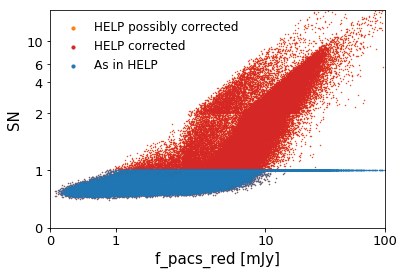

In [128]:
plt.figure()
plt.scatter(xid_pacs['F_PACS_160'], xid_pacs['F_PACS_160']/ferr_pacs_red_2, label = 'HELP possibly corrected', s = 0.1, c ='C1')
plt.scatter(help_corrected_PACS['help_f_pacs_red'], help_corrected_PACS['help_f_pacs_red']/help_corrected_PACS['help_ferr_pacs_red'],\
            label = 'HELP corrected', s = 0.1, c ='C3')
plt.scatter(xid_pacs['F_PACS_160'], xid_pacs['F_PACS_160']/ferr_pacs_red_1, label = 'As in HELP', s = 0.1, c = 'C0')
plt.xlim(0,100)
plt.ylim(0,20)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xticks([0, 1, 10, 100], [0, 1, 10, 100])
plt.yticks([0, 1, 2, 4, 6, 10], [0, 1, 2, 4, 6, 10])
plt.xlabel(r'f_pacs_red [mJy]', fontsize = 15)
plt.ylabel(r'SN', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 10 , loc = 'upper left');

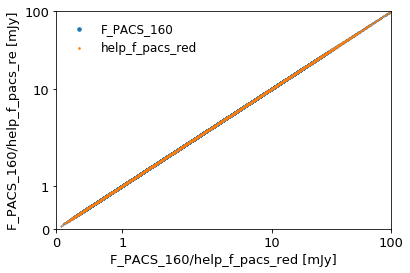

In [125]:
plt.scatter(xid_pacs['F_PACS_160'],xid_pacs['F_PACS_160'], s = 0.5)
plt.scatter(help_corrected_PACS['help_f_pacs_red'], help_corrected_PACS['help_f_pacs_red'], s = 0.1)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xticks([0, 1, 10, 100], [0, 1, 10, 100])
plt.yticks([0, 1, 10, 100], [0, 1, 10, 100])
plt.xlabel(r'F_PACS_160/help_f_pacs_red [mJy]', fontsize = 13)
plt.ylabel(r'F_PACS_160/help_f_pacs_re [mJy]', fontsize = 13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 5 , loc = 'upper left');

# Saving a test file after comparing to Buat et al., 2018 values

In [331]:
#Saving the final CIGALE file without PACS and SPIRE data

test = test[test['redshift_y'] != -9999.99]

COSMOS_CIGALE = Table([test['id'], test['redshift_y'], test['galex.NUV_y'],\
                        test['galex.NUV_err_y'], test['cfht.megacam.u_y'], test['cfht.megacam.u_err_y'],\
                        test['subaru.suprime.B_y'], test['subaru.suprime.B_err_y'], test['subaru.suprime.V_y'],\
                        test['subaru.suprime.V_err_y'], test['subaru.suprime.r_y'], test['subaru.suprime.r_err_y'],\
                        test['subaru.suprime.i_y'], test['subaru.suprime.i_err_y'], test['subaru.suprime.z_y'],\
                        test['subaru.suprime.z_err_y'], test['subaru.hsc.y_y'], test['subaru.hsc.y_err_y'],\
                        test['UKIRT_WFCJ_y'], test['UKIRT_WFCJ_err_y'], test['cfht.wircam.H_y'],\
                        test['cfht.wircam.H_err_y'], test['WFCAM_K_y'], test['WFCAM_K_err_y'],\
                        test['IRAC1_y'], test['IRAC1_err_y'], test['IRAC2_y'],\
                        test['IRAC2_err_y'], test['IRAC3_y'], test['IRAC3_err_y'],\
                        test['IRAC4_y'], test['IRAC4_err_y'],\
                        test['spitzer.mips.24_y'], test['spitzer.mips.24_err_y'],\
                        test['line.NII-654.8+line.H-alpha+line.NII-658.4_y'],\
                        test['line.NII-654.8+line.H-alpha+line.NII-658.4_err_y'],\
                        test['line.H-beta'], test['line.H-beta_err'],\
                        test['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12'],\
                        test['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err'],\
                        test['line.OIII-500.7'], test['line.OIII-500.7_err']],\
               names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/CIGALE_VeroMine.fits')
COSMOS_CIGALE.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                    'CIGALE_file/CIGALE_VeroMine.fits', format='fits')

#===================================================================================================================

#Saving the final CIGALE file with PACS and SPIRE data

test = PACS_SPIRE[PACS_SPIRE['redshift_y'] != -9999.99]

COSMOS_CIGALE_1 = Table([test['id'], test['redshift_y'], test['galex.NUV_y'],\
                        test['galex.NUV_err_y'], test['cfht.megacam.u_y'], test['cfht.megacam.u_err_y'],\
                        test['subaru.suprime.B_y'], test['subaru.suprime.B_err_y'], test['subaru.suprime.V_y'],\
                        test['subaru.suprime.V_err_y'], test['subaru.suprime.r_y'], test['subaru.suprime.r_err_y'],\
                        test['subaru.suprime.i_y'], test['subaru.suprime.i_err_y'], test['subaru.suprime.z_y'],\
                        test['subaru.suprime.z_err_y'], test['subaru.hsc.y_y'], test['subaru.hsc.y_err_y'],\
                        test['UKIRT_WFCJ_y'], test['UKIRT_WFCJ_err_y'], test['cfht.wircam.H_y'],\
                        test['cfht.wircam.H_err_y'], test['WFCAM_K_y'], test['WFCAM_K_err_y'],\
                        test['IRAC1_y'], test['IRAC1_err_y'], test['IRAC2_y'],\
                        test['IRAC2_err_y'], test['IRAC3_y'], test['IRAC3_err_y'],\
                        test['IRAC4_y'], test['IRAC4_err_y'],\
                        test['spitzer.mips.24_y'], test['spitzer.mips.24_err_y'],\
                        test['herschel.pacs.100_y'], test['herschel.pacs.100_err_y'],\
                        test['herschel.pacs.160_y'], test['ferr_pacs_red_corrected'],\
                        test['herschel.spire.PSW_y'], test['herschel.spire.PSW_err_y'], test['herschel.spire.PMW_y'],\
                        test['herschel.spire.PMW_err_y'], test['herschel.spire.PLW_y'], test['herschel.spire.PLW_err_y'],\
                        test['line.NII-654.8+line.H-alpha+line.NII-658.4_y'],\
                        test['line.NII-654.8+line.H-alpha+line.NII-658.4_err_y'],\
                        test['line.H-beta'], test['line.H-beta_err'],\
                        test['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12'],\
                        test['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err'],\
                        test['line.OIII-500.7'], test['line.OIII-500.7_err']],\
               names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err', 'herschel.spire.PMW',\
                        'herschel.spire.PMW_err', 'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/CIGALE_VeroMine_PACSSPIRE.fits')
COSMOS_CIGALE_1.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                    'CIGALE_file/CIGALE_VeroMine_PACSSPIRE.fits', format='fits')
